# Structure Data for BPNN

In [27]:
%load_ext autoreload
%autoreload 2

# IMPORT LIBRARIES
from Dataset import *
import cupy as cp
from bpnn_cuda import BPNN
from tqdm import tqdm


training_data, validation_data, testing_data, ndimen = BPNN.get_data()
print(f"Input Dimension: {ndimen}")

ntrials = 1
max_epochs = 30
init_nc = [ndimen, 200, 2]
init_b = 40
init_lr = 0.5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Input Dimension: 900


# Train Initial BPNN Configuration

In [28]:

model_BPNN = BPNN(init_nc, verbose=True)
final_score, eval_scores, eval_scores_deltas, conv_time = model_BPNN.train(training_data,
                                                                           max_epochs=max_epochs,
                                                                           batch_size=init_b,
                                                                           learning_rate=init_lr,
                                                                           evaluation_data=validation_data)


# Training MLP Network: Sizes=[900, 200, 2]	Epochs=15	Batch-Size=40	Learning-Rate=0.5
 - Training Data Len: 10000
 - Validation Data Len: 800
# Epochs:


  7%|▋         | 1/15 [00:05<01:13,  5.22s/it]

	1. Correct 689/800	(score: 0.86125	delta: 0.86125	delta_avg: 0.86125)


 13%|█▎        | 2/15 [00:10<01:05,  5.06s/it]

	2. Correct 706/800	(score: 0.8825	delta: 0.02124999999999999	delta_avg: 0.44125)


 20%|██        | 3/15 [00:15<00:59,  4.99s/it]

	3. Correct 713/800	(score: 0.89125	delta: 0.008750000000000036	delta_avg: 0.2970833333333333)


 27%|██▋       | 4/15 [00:20<00:54,  4.99s/it]

	4. Correct 718/800	(score: 0.8975	delta: 0.006249999999999978	delta_avg: 0.224375)


 33%|███▎      | 5/15 [00:25<00:50,  5.05s/it]

	5. Correct 721/800	(score: 0.90125	delta: 0.003750000000000031	delta_avg: 0.18025)


 40%|████      | 6/15 [00:30<00:45,  5.11s/it]

	6. Correct 723/800	(score: 0.90375	delta: 0.0025000000000000577	delta_avg: 0.150625)


 47%|████▋     | 7/15 [00:35<00:41,  5.22s/it]

	7. Correct 724/800	(score: 0.905	delta: 0.0012499999999999734	delta_avg: 0.12928571428571428)


 53%|█████▎    | 8/15 [00:41<00:36,  5.28s/it]

	8. Correct 725/800	(score: 0.90625	delta: 0.0012499999999999734	delta_avg: 0.11328125)


 60%|██████    | 9/15 [00:46<00:31,  5.27s/it]

	9. Correct 724/800	(score: 0.905	delta: -0.0012499999999999734	delta_avg: 0.10055555555555556)


 67%|██████▋   | 10/15 [00:51<00:26,  5.28s/it]

	10. Correct 725/800	(score: 0.90625	delta: 0.0012499999999999734	delta_avg: 0.090625)


 73%|███████▎  | 11/15 [00:57<00:21,  5.37s/it]

	11. Correct 732/800	(score: 0.915	delta: 0.008750000000000036	delta_avg: 0.08318181818181819)


 80%|████████  | 12/15 [01:02<00:16,  5.34s/it]

	12. Correct 726/800	(score: 0.9075	delta: -0.007500000000000062	delta_avg: 0.075625)


 87%|████████▋ | 13/15 [01:07<00:10,  5.27s/it]

	13. Correct 727/800	(score: 0.90875	delta: 0.0012499999999999734	delta_avg: 0.06990384615384615)


 93%|█████████▎| 14/15 [01:13<00:05,  5.25s/it]

	14. Correct 727/800	(score: 0.90875	delta: 0.0	delta_avg: 0.06491071428571428)


100%|██████████| 15/15 [01:18<00:00,  5.21s/it]

	15. Correct 727/800	(score: 0.90875	delta: 0.0	delta_avg: 0.06058333333333333)
Converged in 15 epochs with accuracy 0.90875 took 78.22 sec


# Tune Network Configuration

Training Epoch vs. Accuracy (Effect of Network Configuration)


  9%|▉         | 1/11 [01:16<12:49, 76.98s/it]

[900, 50, 2] => 0.91375


 18%|█▊        | 2/11 [02:33<11:31, 76.84s/it]

[900, 100, 2] => 0.92125


 27%|██▋       | 3/11 [03:49<10:11, 76.46s/it]

[900, 200, 2] => 0.9225


 36%|███▋      | 4/11 [05:06<08:57, 76.73s/it]

[900, 400, 2] => 0.92375


 45%|████▌     | 5/11 [06:23<07:40, 76.72s/it]

[900, 800, 2] => 0.91625


 55%|█████▍    | 6/11 [07:41<06:26, 77.25s/it]

[900, 75, 2] => 0.93125


 64%|██████▎   | 7/11 [08:59<05:09, 77.39s/it]

[900, 90, 2] => 0.91875


 73%|███████▎  | 8/11 [10:16<03:51, 77.28s/it]

[900, 110, 2] => 0.91375


 82%|████████▏ | 9/11 [11:32<02:33, 76.96s/it]

[900, 130, 2] => 0.9275


 91%|█████████ | 10/11 [12:50<01:17, 77.24s/it]

[900, 160, 2] => 0.9325


100%|██████████| 11/11 [14:08<00:00, 77.09s/it]

[900, 190, 2] => 0.91375


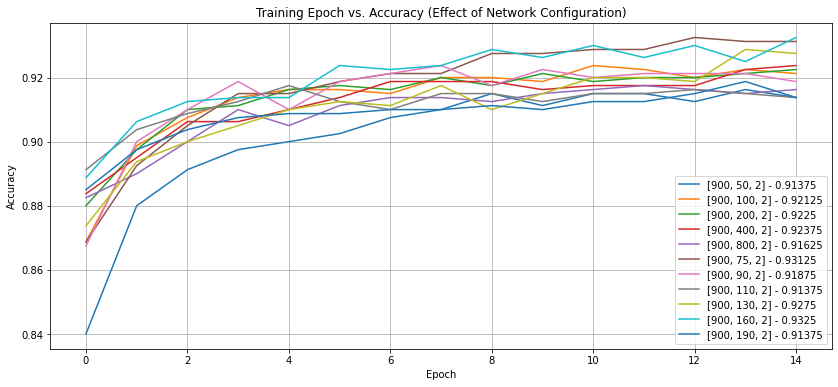

Best network configuration: [900, 160, 2]


In [2]:
def plot_accuracies_hidden_layers_and_nodes(save_dir, layers_arr):
    os.makedirs(save_dir, exist_ok=True)
    print(f"Training Epoch vs. Accuracy (Effect of Network Configuration)")

    fig = plt.figure(figsize=(14, 6))
    plt.title(
        f"Training Epoch vs. Accuracy (Effect of Network Configuration)")
    plt.xlabel("Epoch")
    plt.ylabel('Accuracy')

    best_score = 0
    best_config = None

    for layers in layers_arr:
        final_scores = []
        epoch_scores = []
        # Run an average over multiple trials
        for i in range(ntrials):
            # Get data and train the network
            training_data, validation_data, testing_data, ndimen = BPNN.get_data()
            nn = BPNN(layers, verbose=False)
            final_score, eval_scores, eval_scores_deltas, conv_time = nn.train(training_data,
                                                                               max_epochs=max_epochs,
                                                                               batch_size=init_b,
                                                                               learning_rate=init_lr,
                                                                               evaluation_data=validation_data,
                                                                               evaluation_treshold=None)
            final_scores.append(final_score)
            epoch_scores.append(eval_scores)

        # Compute the averages over the specified number of trials
        final_score_avg = np.average(final_scores)
        epoch_scores = np.mean(epoch_scores, axis=0)

        print(f'{layers} => {final_score_avg} ({conv_time})')
        if final_score_avg > best_score:
            best_score = final_score_avg
            best_config = layers
        plt.plot(epoch_scores, label=f'{layers} - {final_score_avg}')

    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'{save_dir}/bpnn_layers_vs_acc', dpi=100)

    return best_config


layers_arr = [[ndimen, 50, 2],
              [ndimen, 100, 2],
              [ndimen, 200, 2],
              [ndimen, 400, 2],
              [ndimen, 800, 2],
              
              [ndimen, 75, 2],
              [ndimen, 90, 2],
              [ndimen, 110, 2],
              [ndimen, 130, 2],
              [ndimen, 160, 2],
              [ndimen, 190, 2], ]


best_nc = plot_accuracies_hidden_layers_and_nodes("img", layers_arr)
print(f"Best network configuration: {best_nc}")


# Tune Batch Size

Training Epoch vs. Accuracy (Effect of Batch Size)


100%|██████████| 15/15 [01:20<00:00,  5.39s/it]


5 => 0.92875 (80.82013368606567)


100%|██████████| 15/15 [01:22<00:00,  5.53s/it]


8 => 0.91875 (82.89781355857849)


100%|██████████| 15/15 [01:18<00:00,  5.24s/it]


12 => 0.915 (78.60236978530884)


100%|██████████| 15/15 [01:24<00:00,  5.65s/it]


14 => 0.92625 (84.79294848442078)


100%|██████████| 15/15 [01:18<00:00,  5.26s/it]


16 => 0.91875 (78.97292995452881)


100%|██████████| 15/15 [01:12<00:00,  4.83s/it]


18 => 0.91375 (72.47402548789978)


100%|██████████| 15/15 [01:15<00:00,  5.00s/it]


20 => 0.91625 (75.03568124771118)


100%|██████████| 15/15 [01:13<00:00,  4.89s/it]


30 => 0.915 (73.34409499168396)


100%|██████████| 15/15 [01:13<00:00,  4.89s/it]


35 => 0.91875 (73.3113100528717)


100%|██████████| 15/15 [01:13<00:00,  4.90s/it]

40 => 0.9125 (73.45820713043213)


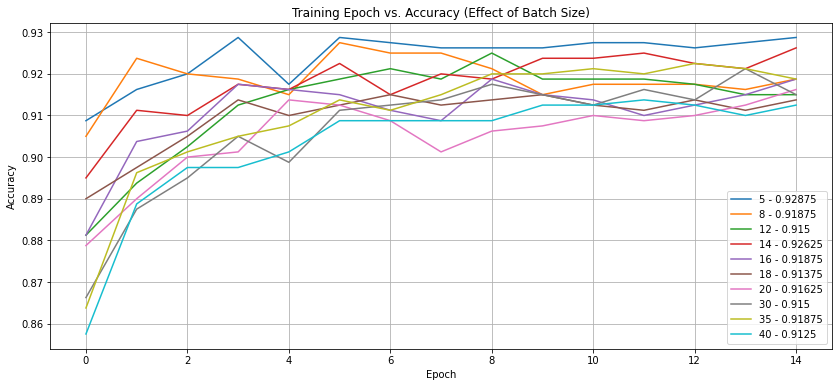

Best batch size: 5


In [29]:
def plot_accuracies_mini_batch_size(save_dir, batch_size_arr):
    os.makedirs(save_dir, exist_ok=True)
    print(f"Training Epoch vs. Accuracy (Effect of Batch Size)")

    fig = plt.figure(figsize=(14, 6))
    plt.title(f"Training Epoch vs. Accuracy (Effect of Batch Size)")
    plt.xlabel("Epoch")
    plt.ylabel('Accuracy')

    best_score = 0
    best_config = None

    for batch_size in batch_size_arr:
        final_scores = []
        epoch_scores = []
        # Run an average over multiple trials
        for i in range(ntrials):
            # Get data and train the network
            training_data, validation_data, testing_data, ndimen = BPNN.get_data()
            nn = BPNN(best_nc, verbose=False)
            final_score, eval_scores, eval_scores_deltas, conv_time = nn.train(training_data,
                                                                               max_epochs=max_epochs,
                                                                               batch_size=batch_size,
                                                                               learning_rate=init_lr,
                                                                               evaluation_data=validation_data,
                                                                               evaluation_treshold=None)
            final_scores.append(final_score)
            epoch_scores.append(eval_scores)

        # Compute the averages over the specified number of trials
        final_score_avg = np.average(final_scores)
        epoch_scores = np.mean(epoch_scores, axis=0)

        print(f'{batch_size} => {final_score_avg} ({conv_time})')
        if final_score_avg > best_score:
            best_score = final_score_avg
            best_config = batch_size
        plt.plot(epoch_scores, label=f'{batch_size} - {final_score_avg}')

    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'{save_dir}/bpnn_batch_vs_acc', dpi=100)

    return best_config


batch_size_arr = [5, 8, 12, 14, 16, 18, 20, 30, 35, 40]
best_b = plot_accuracies_mini_batch_size("img", batch_size_arr)
print(f"Best batch size: {best_b}")

# Tune Learning Rate

Training Epoch vs. Accuracy (Effect of Learning Rate)


100%|██████████| 15/15 [01:17<00:00,  5.20s/it]


0.75 => 0.93375 (77.95185041427612)


100%|██████████| 15/15 [01:18<00:00,  5.26s/it]


0.65 => 0.92 (78.90114140510559)


100%|██████████| 15/15 [01:17<00:00,  5.19s/it]


0.6 => 0.93 (77.81529116630554)


100%|██████████| 15/15 [01:23<00:00,  5.56s/it]


0.55 => 0.9225 (83.35553359985352)


100%|██████████| 15/15 [01:18<00:00,  5.27s/it]


0.5 => 0.92125 (78.9821400642395)


100%|██████████| 15/15 [01:18<00:00,  5.24s/it]


0.45 => 0.92875 (78.58448958396912)


100%|██████████| 15/15 [01:18<00:00,  5.24s/it]


0.4 => 0.92625 (78.66976618766785)


 73%|███████▎  | 11/15 [00:59<00:21,  5.39s/it]


KeyboardInterrupt: 

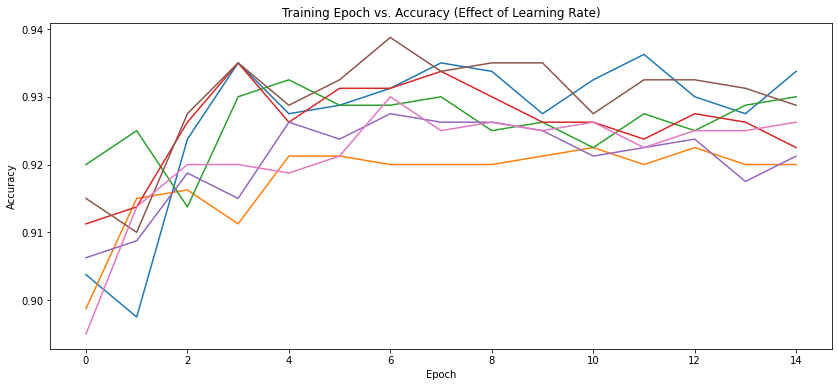

In [31]:
def plot_accuracies_learning_rate(save_dir, learning_rate_arr):
    os.makedirs(save_dir, exist_ok=True)
    print(f"Training Epoch vs. Accuracy (Effect of Learning Rate)")

    fig = plt.figure(figsize=(14, 6))
    plt.title(f"Training Epoch vs. Accuracy (Effect of Learning Rate)")
    plt.xlabel("Epoch")
    plt.ylabel('Accuracy')

    best_score = 0
    best_config = None

    for learning_rate in learning_rate_arr:
        final_scores = []
        epoch_scores = []
        # Run an average over multiple trials
        for i in range(ntrials):
            # Get data and train the network
            training_data, validation_data, testing_data, ndimen = BPNN.get_data()
            nn = BPNN(best_nc, verbose=False)
            final_score, eval_scores, eval_scores_deltas, conv_time = nn.train(training_data,
                                                                               max_epochs=max_epochs,
                                                                               batch_size=best_b,
                                                                               learning_rate=learning_rate,
                                                                               evaluation_data=validation_data,
                                                                               evaluation_treshold=None)

            final_scores.append(final_score)
            epoch_scores.append(eval_scores)

        # Compute the averages over the specified number of trials
        final_score_avg = np.average(final_scores)
        epoch_scores = np.mean(epoch_scores, axis=0)

        print(f'{learning_rate} => {final_score_avg} ({conv_time})')
        if final_score_avg > best_score:
            best_score = final_score_avg
            best_config = learning_rate

        plt.plot(epoch_scores, label=f'{learning_rate} - {final_score_avg}')

    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'{save_dir}/bpnn_lr_vs_acc', dpi=100)

    return best_config


learning_rate_arr = [0.75, 0.65, 0.60, 0.55, 0.5, 0.45, 0.40, 0.35, 0.25, 0.15, 0.1, 0.05, 0.01, 0.005, 0.001]
best_lr = plot_accuracies_learning_rate("img", learning_rate_arr)
print(f"Best learning rate: {best_lr}")

# Hyperband Tuning

In [1]:
from HyperbandTuner import HyperbandTuner
from bpnn_cuda import BPNN

def run_hyperband_tuning():
    training_data, validation_data, testing_data, ndimen = BPNN.get_data()
    print(f"Input Dimension: {ndimen}")

    ht = HyperbandTuner(BPNN, num_trials=1, max_epochs=100, eta=3)

    ht.tune([ndimen, 160, 2], 10, 0.83)

    # print(ht.get_best_hyperparameters())


run_hyperband_tuning()

Input Dimension: 900
# Epochs:  3
# Network Configurations
	[900, 160, 2]
	[900, 106, 2]
	[900, 213, 2]
	[900, 53, 2]
	[900, 266, 2]
# Batch Sizes
	10
	6
	13
	3
	16
# Learning Rates
	0.83
	0.5533333333333333
	1.1066666666666665
	0.2766666666666667
	1.3833333333333333

# Best Model:  0
 - Hypers: [[900, 160, 2], 10, 0.83]
 - Accuracy: 0
 - Time: 0
# Current Model (0/125)
 - Hypers: [[900, 160, 2], 10, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.27s/it]


 - Accuracy: 0.92
 - Time: 15.8 sec

# Best Model:  0.92
 - Hypers: [[900, 160, 2], 10, 0.83]
 - Accuracy: 0.92
 - Time: 15.8
# Current Model (1/125)
 - Hypers: [[900, 160, 2], 10, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.97s/it]


 - Accuracy: 0.91875
 - Time: 14.92 sec

# Best Model:  0.92
 - Hypers: [[900, 160, 2], 10, 0.83]
 - Accuracy: 0.92
 - Time: 15.8
# Current Model (2/125)
 - Hypers: [[900, 160, 2], 10, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.92s/it]


 - Accuracy: 0.92125
 - Time: 14.77 sec

# Best Model:  0.92125
 - Hypers: [[900, 160, 2], 10, 1.1066666666666665]
 - Accuracy: 0.92125
 - Time: 14.77
# Current Model (3/125)
 - Hypers: [[900, 160, 2], 10, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.97s/it]


 - Accuracy: 0.9175
 - Time: 14.91 sec

# Best Model:  0.92125
 - Hypers: [[900, 160, 2], 10, 1.1066666666666665]
 - Accuracy: 0.92125
 - Time: 14.77
# Current Model (4/125)
 - Hypers: [[900, 160, 2], 10, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.03s/it]


 - Accuracy: 0.93125
 - Time: 15.08 sec

# Best Model:  0.93125
 - Hypers: [[900, 160, 2], 10, 1.3833333333333333]
 - Accuracy: 0.93125
 - Time: 15.08
# Current Model (5/125)
 - Hypers: [[900, 160, 2], 6, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.44s/it]


 - Accuracy: 0.92
 - Time: 16.31 sec

# Best Model:  0.93125
 - Hypers: [[900, 160, 2], 10, 1.3833333333333333]
 - Accuracy: 0.93125
 - Time: 15.08
# Current Model (6/125)
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.39s/it]


 - Accuracy: 0.935
 - Time: 16.16 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (7/125)
 - Hypers: [[900, 160, 2], 6, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.52s/it]


 - Accuracy: 0.91625
 - Time: 16.55 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (8/125)
 - Hypers: [[900, 160, 2], 6, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.32s/it]


 - Accuracy: 0.9125
 - Time: 15.96 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (9/125)
 - Hypers: [[900, 160, 2], 6, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.35s/it]


 - Accuracy: 0.92375
 - Time: 16.06 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (10/125)
 - Hypers: [[900, 160, 2], 13, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.15s/it]


 - Accuracy: 0.91875
 - Time: 15.45 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (11/125)
 - Hypers: [[900, 160, 2], 13, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.26s/it]


 - Accuracy: 0.9075
 - Time: 15.78 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (12/125)
 - Hypers: [[900, 160, 2], 13, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.20s/it]


 - Accuracy: 0.9225
 - Time: 15.6 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (13/125)
 - Hypers: [[900, 160, 2], 13, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.32s/it]


 - Accuracy: 0.89875
 - Time: 15.96 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (14/125)
 - Hypers: [[900, 160, 2], 13, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.19s/it]


 - Accuracy: 0.91
 - Time: 15.56 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (15/125)
 - Hypers: [[900, 160, 2], 3, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.59s/it]


 - Accuracy: 0.92125
 - Time: 16.76 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (16/125)
 - Hypers: [[900, 160, 2], 3, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:17<00:00,  5.78s/it]


 - Accuracy: 0.9125
 - Time: 17.33 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (17/125)
 - Hypers: [[900, 160, 2], 3, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.64s/it]


 - Accuracy: 0.89625
 - Time: 16.92 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (18/125)
 - Hypers: [[900, 160, 2], 3, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.52s/it]


 - Accuracy: 0.92625
 - Time: 16.56 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (19/125)
 - Hypers: [[900, 160, 2], 3, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.58s/it]


 - Accuracy: 0.91875
 - Time: 16.74 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (20/125)
 - Hypers: [[900, 160, 2], 16, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.22s/it]


 - Accuracy: 0.91
 - Time: 15.66 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (21/125)
 - Hypers: [[900, 160, 2], 16, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.22s/it]


 - Accuracy: 0.90875
 - Time: 15.67 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (22/125)
 - Hypers: [[900, 160, 2], 16, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.35s/it]


 - Accuracy: 0.91
 - Time: 16.04 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (23/125)
 - Hypers: [[900, 160, 2], 16, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.16s/it]


 - Accuracy: 0.91125
 - Time: 15.48 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (24/125)
 - Hypers: [[900, 160, 2], 16, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.05s/it]


 - Accuracy: 0.92125
 - Time: 15.16 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (25/125)
 - Hypers: [[900, 106, 2], 10, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.26s/it]


 - Accuracy: 0.9275
 - Time: 15.77 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (26/125)
 - Hypers: [[900, 106, 2], 10, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.25s/it]


 - Accuracy: 0.915
 - Time: 15.74 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (27/125)
 - Hypers: [[900, 106, 2], 10, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.21s/it]


 - Accuracy: 0.92875
 - Time: 15.64 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (28/125)
 - Hypers: [[900, 106, 2], 10, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.30s/it]


 - Accuracy: 0.9025
 - Time: 15.89 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (29/125)
 - Hypers: [[900, 106, 2], 10, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.23s/it]


 - Accuracy: 0.92625
 - Time: 15.69 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (30/125)
 - Hypers: [[900, 106, 2], 6, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.05s/it]


 - Accuracy: 0.9175
 - Time: 15.17 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (31/125)
 - Hypers: [[900, 106, 2], 6, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.17s/it]


 - Accuracy: 0.9125
 - Time: 15.52 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (32/125)
 - Hypers: [[900, 106, 2], 6, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.19s/it]


 - Accuracy: 0.915
 - Time: 15.56 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (33/125)
 - Hypers: [[900, 106, 2], 6, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.21s/it]


 - Accuracy: 0.90875
 - Time: 15.64 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (34/125)
 - Hypers: [[900, 106, 2], 6, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.28s/it]


 - Accuracy: 0.92125
 - Time: 15.85 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (35/125)
 - Hypers: [[900, 106, 2], 13, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.22s/it]


 - Accuracy: 0.90625
 - Time: 15.65 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (36/125)
 - Hypers: [[900, 106, 2], 13, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.31s/it]


 - Accuracy: 0.91
 - Time: 15.92 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (37/125)
 - Hypers: [[900, 106, 2], 13, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.29s/it]


 - Accuracy: 0.91625
 - Time: 15.88 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (38/125)
 - Hypers: [[900, 106, 2], 13, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.29s/it]


 - Accuracy: 0.905
 - Time: 15.89 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (39/125)
 - Hypers: [[900, 106, 2], 13, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.32s/it]


 - Accuracy: 0.92875
 - Time: 15.96 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (40/125)
 - Hypers: [[900, 106, 2], 3, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:17<00:00,  5.69s/it]


 - Accuracy: 0.93125
 - Time: 17.08 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (41/125)
 - Hypers: [[900, 106, 2], 3, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.62s/it]


 - Accuracy: 0.91
 - Time: 16.87 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (42/125)
 - Hypers: [[900, 106, 2], 3, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.59s/it]


 - Accuracy: 0.91875
 - Time: 16.78 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (43/125)
 - Hypers: [[900, 106, 2], 3, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.40s/it]


 - Accuracy: 0.92125
 - Time: 16.21 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (44/125)
 - Hypers: [[900, 106, 2], 3, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.63s/it]


 - Accuracy: 0.91125
 - Time: 16.88 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (45/125)
 - Hypers: [[900, 106, 2], 16, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.33s/it]


 - Accuracy: 0.91625
 - Time: 15.99 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (46/125)
 - Hypers: [[900, 106, 2], 16, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.10s/it]


 - Accuracy: 0.91125
 - Time: 15.3 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (47/125)
 - Hypers: [[900, 106, 2], 16, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.19s/it]


 - Accuracy: 0.91625
 - Time: 15.58 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (48/125)
 - Hypers: [[900, 106, 2], 16, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.21s/it]


 - Accuracy: 0.895
 - Time: 15.64 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (49/125)
 - Hypers: [[900, 106, 2], 16, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.07s/it]


 - Accuracy: 0.91875
 - Time: 15.21 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (50/125)
 - Hypers: [[900, 213, 2], 10, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.25s/it]


 - Accuracy: 0.92
 - Time: 15.76 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (51/125)
 - Hypers: [[900, 213, 2], 10, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.07s/it]


 - Accuracy: 0.915
 - Time: 15.2 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (52/125)
 - Hypers: [[900, 213, 2], 10, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.05s/it]


 - Accuracy: 0.93
 - Time: 15.14 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (53/125)
 - Hypers: [[900, 213, 2], 10, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.19s/it]


 - Accuracy: 0.90625
 - Time: 15.56 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (54/125)
 - Hypers: [[900, 213, 2], 10, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.54s/it]


 - Accuracy: 0.93375
 - Time: 16.61 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (55/125)
 - Hypers: [[900, 213, 2], 6, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.21s/it]


 - Accuracy: 0.91875
 - Time: 15.62 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (56/125)
 - Hypers: [[900, 213, 2], 6, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.04s/it]


 - Accuracy: 0.92375
 - Time: 15.13 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (57/125)
 - Hypers: [[900, 213, 2], 6, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.00s/it]


 - Accuracy: 0.9075
 - Time: 15.01 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (58/125)
 - Hypers: [[900, 213, 2], 6, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.27s/it]


 - Accuracy: 0.91375
 - Time: 15.82 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (59/125)
 - Hypers: [[900, 213, 2], 6, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.05s/it]


 - Accuracy: 0.92625
 - Time: 15.15 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (60/125)
 - Hypers: [[900, 213, 2], 13, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.94s/it]


 - Accuracy: 0.92125
 - Time: 14.82 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (61/125)
 - Hypers: [[900, 213, 2], 13, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.90s/it]


 - Accuracy: 0.91875
 - Time: 14.72 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (62/125)
 - Hypers: [[900, 213, 2], 13, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.93s/it]


 - Accuracy: 0.9125
 - Time: 14.8 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (63/125)
 - Hypers: [[900, 213, 2], 13, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.96s/it]


 - Accuracy: 0.91375
 - Time: 14.88 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (64/125)
 - Hypers: [[900, 213, 2], 13, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.10s/it]


 - Accuracy: 0.9125
 - Time: 15.3 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (65/125)
 - Hypers: [[900, 213, 2], 3, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.45s/it]


 - Accuracy: 0.925
 - Time: 16.35 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (66/125)
 - Hypers: [[900, 213, 2], 3, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.22s/it]


 - Accuracy: 0.91
 - Time: 15.65 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (67/125)
 - Hypers: [[900, 213, 2], 3, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.61s/it]


 - Accuracy: 0.92
 - Time: 16.82 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (68/125)
 - Hypers: [[900, 213, 2], 3, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.45s/it]


 - Accuracy: 0.91375
 - Time: 16.34 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (69/125)
 - Hypers: [[900, 213, 2], 3, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.49s/it]


 - Accuracy: 0.91375
 - Time: 16.46 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (70/125)
 - Hypers: [[900, 213, 2], 16, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  5.00s/it]


 - Accuracy: 0.92125
 - Time: 15.0 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (71/125)
 - Hypers: [[900, 213, 2], 16, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.92s/it]


 - Accuracy: 0.91375
 - Time: 14.75 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (72/125)
 - Hypers: [[900, 213, 2], 16, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.99s/it]


 - Accuracy: 0.90875
 - Time: 14.98 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (73/125)
 - Hypers: [[900, 213, 2], 16, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.07s/it]


 - Accuracy: 0.8975
 - Time: 15.22 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (74/125)
 - Hypers: [[900, 213, 2], 16, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.99s/it]


 - Accuracy: 0.92125
 - Time: 14.97 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (75/125)
 - Hypers: [[900, 53, 2], 10, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.17s/it]


 - Accuracy: 0.9125
 - Time: 15.5 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (76/125)
 - Hypers: [[900, 53, 2], 10, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.39s/it]


 - Accuracy: 0.92375
 - Time: 16.19 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (77/125)
 - Hypers: [[900, 53, 2], 10, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.32s/it]


 - Accuracy: 0.91125
 - Time: 15.96 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (78/125)
 - Hypers: [[900, 53, 2], 10, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.21s/it]


 - Accuracy: 0.89625
 - Time: 15.62 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (79/125)
 - Hypers: [[900, 53, 2], 10, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.13s/it]


 - Accuracy: 0.9225
 - Time: 15.4 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (80/125)
 - Hypers: [[900, 53, 2], 6, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.17s/it]


 - Accuracy: 0.92
 - Time: 15.53 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (81/125)
 - Hypers: [[900, 53, 2], 6, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.95s/it]


 - Accuracy: 0.93
 - Time: 14.85 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (82/125)
 - Hypers: [[900, 53, 2], 6, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.06s/it]


 - Accuracy: 0.9225
 - Time: 15.18 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (83/125)
 - Hypers: [[900, 53, 2], 6, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.95s/it]


 - Accuracy: 0.92375
 - Time: 14.86 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (84/125)
 - Hypers: [[900, 53, 2], 6, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.94s/it]


 - Accuracy: 0.9225
 - Time: 14.83 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (85/125)
 - Hypers: [[900, 53, 2], 13, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.84s/it]


 - Accuracy: 0.9075
 - Time: 14.51 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (86/125)
 - Hypers: [[900, 53, 2], 13, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.85s/it]


 - Accuracy: 0.8975
 - Time: 14.55 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (87/125)
 - Hypers: [[900, 53, 2], 13, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.86s/it]


 - Accuracy: 0.9175
 - Time: 14.57 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (88/125)
 - Hypers: [[900, 53, 2], 13, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.93s/it]


 - Accuracy: 0.89125
 - Time: 14.8 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (89/125)
 - Hypers: [[900, 53, 2], 13, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.81s/it]


 - Accuracy: 0.915
 - Time: 14.43 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (90/125)
 - Hypers: [[900, 53, 2], 3, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.12s/it]


 - Accuracy: 0.92875
 - Time: 15.37 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (91/125)
 - Hypers: [[900, 53, 2], 3, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.12s/it]


 - Accuracy: 0.89625
 - Time: 15.35 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (92/125)
 - Hypers: [[900, 53, 2], 3, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.12s/it]


 - Accuracy: 0.91125
 - Time: 15.36 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (93/125)
 - Hypers: [[900, 53, 2], 3, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.11s/it]


 - Accuracy: 0.9225
 - Time: 15.34 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (94/125)
 - Hypers: [[900, 53, 2], 3, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.23s/it]


 - Accuracy: 0.9275
 - Time: 15.69 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (95/125)
 - Hypers: [[900, 53, 2], 16, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.81s/it]


 - Accuracy: 0.91
 - Time: 14.44 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (96/125)
 - Hypers: [[900, 53, 2], 16, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.80s/it]


 - Accuracy: 0.90375
 - Time: 14.41 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (97/125)
 - Hypers: [[900, 53, 2], 16, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.83s/it]


 - Accuracy: 0.91
 - Time: 14.48 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (98/125)
 - Hypers: [[900, 53, 2], 16, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.82s/it]


 - Accuracy: 0.90375
 - Time: 14.47 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (99/125)
 - Hypers: [[900, 53, 2], 16, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.81s/it]


 - Accuracy: 0.91
 - Time: 14.42 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (100/125)
 - Hypers: [[900, 266, 2], 10, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.98s/it]


 - Accuracy: 0.92125
 - Time: 14.94 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (101/125)
 - Hypers: [[900, 266, 2], 10, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.92s/it]


 - Accuracy: 0.92375
 - Time: 14.77 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (102/125)
 - Hypers: [[900, 266, 2], 10, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.89s/it]


 - Accuracy: 0.925
 - Time: 14.67 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (103/125)
 - Hypers: [[900, 266, 2], 10, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.96s/it]


 - Accuracy: 0.91125
 - Time: 14.89 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (104/125)
 - Hypers: [[900, 266, 2], 10, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.91s/it]


 - Accuracy: 0.92125
 - Time: 14.74 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (105/125)
 - Hypers: [[900, 266, 2], 6, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.01s/it]


 - Accuracy: 0.91875
 - Time: 15.04 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (106/125)
 - Hypers: [[900, 266, 2], 6, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.03s/it]


 - Accuracy: 0.92
 - Time: 15.08 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (107/125)
 - Hypers: [[900, 266, 2], 6, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.06s/it]


 - Accuracy: 0.925
 - Time: 15.2 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (108/125)
 - Hypers: [[900, 266, 2], 6, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.01s/it]


 - Accuracy: 0.91
 - Time: 15.02 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (109/125)
 - Hypers: [[900, 266, 2], 6, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.03s/it]


 - Accuracy: 0.92125
 - Time: 15.11 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (110/125)
 - Hypers: [[900, 266, 2], 13, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.90s/it]


 - Accuracy: 0.90625
 - Time: 14.69 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (111/125)
 - Hypers: [[900, 266, 2], 13, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.93s/it]


 - Accuracy: 0.91
 - Time: 14.8 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (112/125)
 - Hypers: [[900, 266, 2], 13, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.93s/it]


 - Accuracy: 0.92125
 - Time: 14.79 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (113/125)
 - Hypers: [[900, 266, 2], 13, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:14<00:00,  4.91s/it]


 - Accuracy: 0.895
 - Time: 14.73 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (114/125)
 - Hypers: [[900, 266, 2], 13, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.10s/it]


 - Accuracy: 0.92625
 - Time: 15.29 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (115/125)
 - Hypers: [[900, 266, 2], 3, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.46s/it]


 - Accuracy: 0.92125
 - Time: 16.4 sec

# Best Model:  0.935
 - Hypers: [[900, 160, 2], 6, 0.5533333333333333]
 - Accuracy: 0.935
 - Time: 16.16
# Current Model (116/125)
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:16<00:00,  5.43s/it]


 - Accuracy: 0.9375
 - Time: 16.28 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (117/125)
 - Hypers: [[900, 266, 2], 3, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.26s/it]


 - Accuracy: 0.90625
 - Time: 15.79 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (118/125)
 - Hypers: [[900, 266, 2], 3, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.25s/it]


 - Accuracy: 0.915
 - Time: 15.75 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (119/125)
 - Hypers: [[900, 266, 2], 3, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.26s/it]


 - Accuracy: 0.9175
 - Time: 15.77 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (120/125)
 - Hypers: [[900, 266, 2], 16, 0.83]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.02s/it]


 - Accuracy: 0.91
 - Time: 15.06 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (121/125)
 - Hypers: [[900, 266, 2], 16, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.08s/it]


 - Accuracy: 0.92375
 - Time: 15.25 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (122/125)
 - Hypers: [[900, 266, 2], 16, 1.1066666666666665]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.09s/it]


 - Accuracy: 0.9275
 - Time: 15.27 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (123/125)
 - Hypers: [[900, 266, 2], 16, 0.2766666666666667]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.05s/it]


 - Accuracy: 0.90125
 - Time: 15.15 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (124/125)
 - Hypers: [[900, 266, 2], 16, 1.3833333333333333]
 - Trial 0/1


100%|██████████| 3/3 [00:15<00:00,  5.12s/it]


 - Accuracy: 0.91375
 - Time: 15.37 sec
# Epochs:  9
# Network Configurations
	[900, 266, 2]
	[900, 177, 2]
	[900, 354, 2]
	[900, 88, 2]
	[900, 443, 2]
# Batch Sizes
	3
	2
	4
	1
	5
# Learning Rates
	0.5533333333333333
	0.36888888888888893
	0.7377777777777778
	0.18444444444444447
	0.9222222222222223

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (0/125)
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.35s/it]


 - Accuracy: 0.93125
 - Time: 48.18 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (1/125)
 - Hypers: [[900, 266, 2], 3, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:47<00:00,  5.32s/it]


 - Accuracy: 0.93125
 - Time: 47.89 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (2/125)
 - Hypers: [[900, 266, 2], 3, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.41s/it]


 - Accuracy: 0.935
 - Time: 48.66 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (3/125)
 - Hypers: [[900, 266, 2], 3, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.34s/it]


 - Accuracy: 0.91375
 - Time: 48.03 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (4/125)
 - Hypers: [[900, 266, 2], 3, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:49<00:00,  5.47s/it]


 - Accuracy: 0.93125
 - Time: 49.25 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (5/125)
 - Hypers: [[900, 266, 2], 2, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:50<00:00,  5.63s/it]


 - Accuracy: 0.92375
 - Time: 50.7 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (6/125)
 - Hypers: [[900, 266, 2], 2, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:50<00:00,  5.65s/it]


 - Accuracy: 0.93625
 - Time: 50.81 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (7/125)
 - Hypers: [[900, 266, 2], 2, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:50<00:00,  5.56s/it]


 - Accuracy: 0.925
 - Time: 50.05 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (8/125)
 - Hypers: [[900, 266, 2], 2, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.39s/it]


 - Accuracy: 0.93
 - Time: 48.55 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (9/125)
 - Hypers: [[900, 266, 2], 2, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:47<00:00,  5.33s/it]


 - Accuracy: 0.9325
 - Time: 47.95 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (10/125)
 - Hypers: [[900, 266, 2], 4, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.11s/it]


 - Accuracy: 0.92125
 - Time: 45.96 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (11/125)
 - Hypers: [[900, 266, 2], 4, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.06s/it]


 - Accuracy: 0.93125
 - Time: 45.58 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (12/125)
 - Hypers: [[900, 266, 2], 4, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.09s/it]


 - Accuracy: 0.93
 - Time: 45.77 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (13/125)
 - Hypers: [[900, 266, 2], 4, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.09s/it]


 - Accuracy: 0.925
 - Time: 45.8 sec

# Best Model:  0.9375
 - Hypers: [[900, 266, 2], 3, 0.5533333333333333]
 - Accuracy: 0.9375
 - Time: 16.28
# Current Model (14/125)
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.09s/it]


 - Accuracy: 0.93875
 - Time: 45.77 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (15/125)
 - Hypers: [[900, 266, 2], 1, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:52<00:00,  5.86s/it]


 - Accuracy: 0.89375
 - Time: 52.71 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (16/125)
 - Hypers: [[900, 266, 2], 1, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:53<00:00,  5.90s/it]


 - Accuracy: 0.93375
 - Time: 53.13 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (17/125)
 - Hypers: [[900, 266, 2], 1, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:52<00:00,  5.89s/it]


 - Accuracy: 0.9175
 - Time: 52.98 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (18/125)
 - Hypers: [[900, 266, 2], 1, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:53<00:00,  5.92s/it]


 - Accuracy: 0.92375
 - Time: 53.28 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (19/125)
 - Hypers: [[900, 266, 2], 1, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:52<00:00,  5.87s/it]


 - Accuracy: 0.91875
 - Time: 52.82 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (20/125)
 - Hypers: [[900, 266, 2], 5, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.03s/it]


 - Accuracy: 0.925
 - Time: 45.26 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (21/125)
 - Hypers: [[900, 266, 2], 5, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.04s/it]


 - Accuracy: 0.915
 - Time: 45.39 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (22/125)
 - Hypers: [[900, 266, 2], 5, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.08s/it]


 - Accuracy: 0.93
 - Time: 45.73 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (23/125)
 - Hypers: [[900, 266, 2], 5, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.06s/it]


 - Accuracy: 0.915
 - Time: 45.5 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (24/125)
 - Hypers: [[900, 266, 2], 5, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.06s/it]


 - Accuracy: 0.935
 - Time: 45.53 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (25/125)
 - Hypers: [[900, 177, 2], 3, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.14s/it]


 - Accuracy: 0.92625
 - Time: 46.29 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (26/125)
 - Hypers: [[900, 177, 2], 3, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:49<00:00,  5.49s/it]


 - Accuracy: 0.9275
 - Time: 49.42 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (27/125)
 - Hypers: [[900, 177, 2], 3, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:49<00:00,  5.49s/it]


 - Accuracy: 0.92375
 - Time: 49.4 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (28/125)
 - Hypers: [[900, 177, 2], 3, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:47<00:00,  5.25s/it]


 - Accuracy: 0.915
 - Time: 47.23 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (29/125)
 - Hypers: [[900, 177, 2], 3, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.11s/it]


 - Accuracy: 0.93125
 - Time: 46.01 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (30/125)
 - Hypers: [[900, 177, 2], 2, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:47<00:00,  5.30s/it]


 - Accuracy: 0.925
 - Time: 47.73 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (31/125)
 - Hypers: [[900, 177, 2], 2, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:47<00:00,  5.27s/it]


 - Accuracy: 0.92875
 - Time: 47.47 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (32/125)
 - Hypers: [[900, 177, 2], 2, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:47<00:00,  5.33s/it]


 - Accuracy: 0.92
 - Time: 47.94 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (33/125)
 - Hypers: [[900, 177, 2], 2, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:47<00:00,  5.31s/it]


 - Accuracy: 0.925
 - Time: 47.76 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (34/125)
 - Hypers: [[900, 177, 2], 2, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.34s/it]


 - Accuracy: 0.92375
 - Time: 48.04 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (35/125)
 - Hypers: [[900, 177, 2], 4, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.03s/it]


 - Accuracy: 0.91
 - Time: 45.28 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (36/125)
 - Hypers: [[900, 177, 2], 4, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.04s/it]


 - Accuracy: 0.93375
 - Time: 45.32 sec

# Best Model:  0.93875
 - Hypers: [[900, 266, 2], 4, 0.9222222222222223]
 - Accuracy: 0.93875
 - Time: 45.77
# Current Model (37/125)
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.02s/it]


 - Accuracy: 0.9425
 - Time: 45.22 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (38/125)
 - Hypers: [[900, 177, 2], 4, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.07s/it]


 - Accuracy: 0.91625
 - Time: 45.67 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (39/125)
 - Hypers: [[900, 177, 2], 4, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.01s/it]


 - Accuracy: 0.93625
 - Time: 45.13 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (40/125)
 - Hypers: [[900, 177, 2], 1, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:52<00:00,  5.88s/it]


 - Accuracy: 0.92875
 - Time: 52.9 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (41/125)
 - Hypers: [[900, 177, 2], 1, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:53<00:00,  5.97s/it]


 - Accuracy: 0.8975
 - Time: 53.78 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (42/125)
 - Hypers: [[900, 177, 2], 1, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:54<00:00,  6.02s/it]


 - Accuracy: 0.9025
 - Time: 54.21 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (43/125)
 - Hypers: [[900, 177, 2], 1, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:55<00:00,  6.12s/it]


 - Accuracy: 0.93125
 - Time: 55.11 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (44/125)
 - Hypers: [[900, 177, 2], 1, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:55<00:00,  6.16s/it]


 - Accuracy: 0.91625
 - Time: 55.46 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (45/125)
 - Hypers: [[900, 177, 2], 5, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.21s/it]


 - Accuracy: 0.9225
 - Time: 46.93 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (46/125)
 - Hypers: [[900, 177, 2], 5, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:47<00:00,  5.26s/it]


 - Accuracy: 0.935
 - Time: 47.37 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (47/125)
 - Hypers: [[900, 177, 2], 5, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:47<00:00,  5.23s/it]


 - Accuracy: 0.93125
 - Time: 47.1 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (48/125)
 - Hypers: [[900, 177, 2], 5, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.06s/it]


 - Accuracy: 0.9125
 - Time: 45.51 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (49/125)
 - Hypers: [[900, 177, 2], 5, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:44<00:00,  4.96s/it]


 - Accuracy: 0.9325
 - Time: 44.66 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (50/125)
 - Hypers: [[900, 354, 2], 3, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.17s/it]


 - Accuracy: 0.9375
 - Time: 46.49 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (51/125)
 - Hypers: [[900, 354, 2], 3, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.16s/it]


 - Accuracy: 0.9325
 - Time: 46.44 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (52/125)
 - Hypers: [[900, 354, 2], 3, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.16s/it]


 - Accuracy: 0.9275
 - Time: 46.48 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (53/125)
 - Hypers: [[900, 354, 2], 3, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.18s/it]


 - Accuracy: 0.91625
 - Time: 46.61 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (54/125)
 - Hypers: [[900, 354, 2], 3, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.15s/it]


 - Accuracy: 0.92625
 - Time: 46.33 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (55/125)
 - Hypers: [[900, 354, 2], 2, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.34s/it]


 - Accuracy: 0.935
 - Time: 48.08 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (56/125)
 - Hypers: [[900, 354, 2], 2, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.40s/it]


 - Accuracy: 0.9325
 - Time: 48.59 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (57/125)
 - Hypers: [[900, 354, 2], 2, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.35s/it]


 - Accuracy: 0.92125
 - Time: 48.13 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (58/125)
 - Hypers: [[900, 354, 2], 2, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:49<00:00,  5.50s/it]


 - Accuracy: 0.93125
 - Time: 49.5 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (59/125)
 - Hypers: [[900, 354, 2], 2, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.36s/it]


 - Accuracy: 0.9325
 - Time: 48.22 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (60/125)
 - Hypers: [[900, 354, 2], 4, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.07s/it]


 - Accuracy: 0.93625
 - Time: 45.61 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (61/125)
 - Hypers: [[900, 354, 2], 4, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.09s/it]


 - Accuracy: 0.92625
 - Time: 45.8 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (62/125)
 - Hypers: [[900, 354, 2], 4, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.08s/it]


 - Accuracy: 0.93125
 - Time: 45.77 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (63/125)
 - Hypers: [[900, 354, 2], 4, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.09s/it]


 - Accuracy: 0.9125
 - Time: 45.79 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (64/125)
 - Hypers: [[900, 354, 2], 4, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.09s/it]


 - Accuracy: 0.9375
 - Time: 45.82 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (65/125)
 - Hypers: [[900, 354, 2], 1, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:53<00:00,  5.97s/it]


 - Accuracy: 0.9275
 - Time: 53.7 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (66/125)
 - Hypers: [[900, 354, 2], 1, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:53<00:00,  5.92s/it]


 - Accuracy: 0.92375
 - Time: 53.29 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (67/125)
 - Hypers: [[900, 354, 2], 1, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:53<00:00,  5.91s/it]


 - Accuracy: 0.92375
 - Time: 53.17 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (68/125)
 - Hypers: [[900, 354, 2], 1, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:52<00:00,  5.88s/it]


 - Accuracy: 0.94
 - Time: 52.95 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (69/125)
 - Hypers: [[900, 354, 2], 1, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:52<00:00,  5.88s/it]


 - Accuracy: 0.89625
 - Time: 52.93 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (70/125)
 - Hypers: [[900, 354, 2], 5, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.01s/it]


 - Accuracy: 0.92625
 - Time: 45.12 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (71/125)
 - Hypers: [[900, 354, 2], 5, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.02s/it]


 - Accuracy: 0.925
 - Time: 45.21 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (72/125)
 - Hypers: [[900, 354, 2], 5, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.02s/it]


 - Accuracy: 0.92875
 - Time: 45.14 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (73/125)
 - Hypers: [[900, 354, 2], 5, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.05s/it]


 - Accuracy: 0.90875
 - Time: 45.49 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (74/125)
 - Hypers: [[900, 354, 2], 5, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:47<00:00,  5.27s/it]


 - Accuracy: 0.9275
 - Time: 47.44 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (75/125)
 - Hypers: [[900, 88, 2], 3, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.43s/it]


 - Accuracy: 0.93
 - Time: 48.85 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (76/125)
 - Hypers: [[900, 88, 2], 3, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:49<00:00,  5.44s/it]


 - Accuracy: 0.925
 - Time: 49.0 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (77/125)
 - Hypers: [[900, 88, 2], 3, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.18s/it]


 - Accuracy: 0.93125
 - Time: 46.62 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (78/125)
 - Hypers: [[900, 88, 2], 3, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.17s/it]


 - Accuracy: 0.92875
 - Time: 46.55 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (79/125)
 - Hypers: [[900, 88, 2], 3, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.20s/it]


 - Accuracy: 0.92
 - Time: 46.82 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (80/125)
 - Hypers: [[900, 88, 2], 2, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.38s/it]


 - Accuracy: 0.92625
 - Time: 48.42 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (81/125)
 - Hypers: [[900, 88, 2], 2, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.39s/it]


 - Accuracy: 0.9375
 - Time: 48.54 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (82/125)
 - Hypers: [[900, 88, 2], 2, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:50<00:00,  5.58s/it]


 - Accuracy: 0.93375
 - Time: 50.19 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (83/125)
 - Hypers: [[900, 88, 2], 2, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:50<00:00,  5.62s/it]


 - Accuracy: 0.9325
 - Time: 50.61 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (84/125)
 - Hypers: [[900, 88, 2], 2, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:49<00:00,  5.47s/it]


 - Accuracy: 0.92875
 - Time: 49.24 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (85/125)
 - Hypers: [[900, 88, 2], 4, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.09s/it]


 - Accuracy: 0.92125
 - Time: 45.8 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (86/125)
 - Hypers: [[900, 88, 2], 4, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.10s/it]


 - Accuracy: 0.925
 - Time: 45.89 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (87/125)
 - Hypers: [[900, 88, 2], 4, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.11s/it]


 - Accuracy: 0.93625
 - Time: 46.03 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (88/125)
 - Hypers: [[900, 88, 2], 4, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.07s/it]


 - Accuracy: 0.9175
 - Time: 45.61 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (89/125)
 - Hypers: [[900, 88, 2], 4, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.09s/it]


 - Accuracy: 0.93125
 - Time: 45.82 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (90/125)
 - Hypers: [[900, 88, 2], 1, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:52<00:00,  5.89s/it]


 - Accuracy: 0.9225
 - Time: 52.99 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (91/125)
 - Hypers: [[900, 88, 2], 1, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:52<00:00,  5.89s/it]


 - Accuracy: 0.9175
 - Time: 52.98 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (92/125)
 - Hypers: [[900, 88, 2], 1, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:52<00:00,  5.88s/it]


 - Accuracy: 0.91125
 - Time: 52.88 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (93/125)
 - Hypers: [[900, 88, 2], 1, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:53<00:00,  5.94s/it]


 - Accuracy: 0.93
 - Time: 53.42 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (94/125)
 - Hypers: [[900, 88, 2], 1, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:53<00:00,  5.91s/it]


 - Accuracy: 0.86625
 - Time: 53.15 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (95/125)
 - Hypers: [[900, 88, 2], 5, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.04s/it]


 - Accuracy: 0.93
 - Time: 45.38 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (96/125)
 - Hypers: [[900, 88, 2], 5, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.03s/it]


 - Accuracy: 0.9175
 - Time: 45.27 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (97/125)
 - Hypers: [[900, 88, 2], 5, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.04s/it]


 - Accuracy: 0.92625
 - Time: 45.38 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (98/125)
 - Hypers: [[900, 88, 2], 5, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.04s/it]


 - Accuracy: 0.91125
 - Time: 45.37 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (99/125)
 - Hypers: [[900, 88, 2], 5, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.05s/it]


 - Accuracy: 0.93375
 - Time: 45.42 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (100/125)
 - Hypers: [[900, 443, 2], 3, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.20s/it]


 - Accuracy: 0.925
 - Time: 46.79 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (101/125)
 - Hypers: [[900, 443, 2], 3, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.16s/it]


 - Accuracy: 0.93375
 - Time: 46.45 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (102/125)
 - Hypers: [[900, 443, 2], 3, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.14s/it]


 - Accuracy: 0.92625
 - Time: 46.29 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (103/125)
 - Hypers: [[900, 443, 2], 3, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.17s/it]


 - Accuracy: 0.92875
 - Time: 46.51 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (104/125)
 - Hypers: [[900, 443, 2], 3, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.18s/it]


 - Accuracy: 0.93875
 - Time: 46.65 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (105/125)
 - Hypers: [[900, 443, 2], 2, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.37s/it]


 - Accuracy: 0.93875
 - Time: 48.32 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (106/125)
 - Hypers: [[900, 443, 2], 2, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.34s/it]


 - Accuracy: 0.9275
 - Time: 48.07 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (107/125)
 - Hypers: [[900, 443, 2], 2, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:47<00:00,  5.32s/it]


 - Accuracy: 0.93375
 - Time: 47.92 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (108/125)
 - Hypers: [[900, 443, 2], 2, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.36s/it]


 - Accuracy: 0.91375
 - Time: 48.26 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (109/125)
 - Hypers: [[900, 443, 2], 2, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:47<00:00,  5.33s/it]


 - Accuracy: 0.92125
 - Time: 48.0 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (110/125)
 - Hypers: [[900, 443, 2], 4, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.09s/it]


 - Accuracy: 0.93625
 - Time: 45.78 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (111/125)
 - Hypers: [[900, 443, 2], 4, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.05s/it]


 - Accuracy: 0.91375
 - Time: 45.49 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (112/125)
 - Hypers: [[900, 443, 2], 4, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.08s/it]


 - Accuracy: 0.94
 - Time: 45.7 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (113/125)
 - Hypers: [[900, 443, 2], 4, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.07s/it]


 - Accuracy: 0.91875
 - Time: 45.61 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (114/125)
 - Hypers: [[900, 443, 2], 4, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:45<00:00,  5.10s/it]


 - Accuracy: 0.8975
 - Time: 45.92 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (115/125)
 - Hypers: [[900, 443, 2], 1, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:52<00:00,  5.86s/it]


 - Accuracy: 0.84625
 - Time: 52.78 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (116/125)
 - Hypers: [[900, 443, 2], 1, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:52<00:00,  5.86s/it]


 - Accuracy: 0.93875
 - Time: 52.75 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (117/125)
 - Hypers: [[900, 443, 2], 1, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:52<00:00,  5.86s/it]


 - Accuracy: 0.88625
 - Time: 52.73 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (118/125)
 - Hypers: [[900, 443, 2], 1, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:53<00:00,  5.92s/it]


 - Accuracy: 0.92625
 - Time: 53.28 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (119/125)
 - Hypers: [[900, 443, 2], 1, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:54<00:00,  6.06s/it]


 - Accuracy: 0.88875
 - Time: 54.52 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (120/125)
 - Hypers: [[900, 443, 2], 5, 0.5533333333333333]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.16s/it]


 - Accuracy: 0.9325
 - Time: 46.43 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (121/125)
 - Hypers: [[900, 443, 2], 5, 0.36888888888888893]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.15s/it]


 - Accuracy: 0.92125
 - Time: 46.35 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (122/125)
 - Hypers: [[900, 443, 2], 5, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.19s/it]


 - Accuracy: 0.925
 - Time: 46.67 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (123/125)
 - Hypers: [[900, 443, 2], 5, 0.18444444444444447]
 - Trial 0/1


100%|██████████| 9/9 [00:46<00:00,  5.18s/it]


 - Accuracy: 0.92125
 - Time: 46.63 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (124/125)
 - Hypers: [[900, 443, 2], 5, 0.9222222222222223]
 - Trial 0/1


100%|██████████| 9/9 [00:48<00:00,  5.34s/it]


 - Accuracy: 0.9425
 - Time: 48.06 sec
# Epochs:  27
# Network Configurations
	[900, 177, 2]
	[900, 118, 2]
	[900, 236, 2]
	[900, 59, 2]
	[900, 295, 2]
# Batch Sizes
	4
	2
	5
	1
	6
# Learning Rates
	0.7377777777777778
	0.4918518518518519
	0.9837037037037036
	0.24592592592592594
	1.2296296296296296

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (0/125)
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:25<00:00,  5.37s/it]


 - Accuracy: 0.92875
 - Time: 145.11 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (1/125)
 - Hypers: [[900, 177, 2], 4, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:26<00:00,  5.42s/it]


 - Accuracy: 0.9325
 - Time: 146.44 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (2/125)
 - Hypers: [[900, 177, 2], 4, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:24<00:00,  5.37s/it]


 - Accuracy: 0.9425
 - Time: 144.88 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (3/125)
 - Hypers: [[900, 177, 2], 4, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:25<00:00,  5.41s/it]


 - Accuracy: 0.91125
 - Time: 145.97 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (4/125)
 - Hypers: [[900, 177, 2], 4, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:25<00:00,  5.38s/it]


 - Accuracy: 0.93
 - Time: 145.13 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (5/125)
 - Hypers: [[900, 177, 2], 2, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:33<00:00,  5.67s/it]


 - Accuracy: 0.9175
 - Time: 153.22 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (6/125)
 - Hypers: [[900, 177, 2], 2, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:32<00:00,  5.66s/it]


 - Accuracy: 0.9375
 - Time: 152.94 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (7/125)
 - Hypers: [[900, 177, 2], 2, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:31<00:00,  5.62s/it]


 - Accuracy: 0.9375
 - Time: 151.83 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (8/125)
 - Hypers: [[900, 177, 2], 2, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:28<00:00,  5.49s/it]


 - Accuracy: 0.92125
 - Time: 148.32 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (9/125)
 - Hypers: [[900, 177, 2], 2, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:34<00:00,  5.72s/it]


 - Accuracy: 0.88125
 - Time: 154.51 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (10/125)
 - Hypers: [[900, 177, 2], 5, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:23<00:00,  5.32s/it]


 - Accuracy: 0.9275
 - Time: 143.55 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (11/125)
 - Hypers: [[900, 177, 2], 5, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:23<00:00,  5.33s/it]


 - Accuracy: 0.92875
 - Time: 143.88 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (12/125)
 - Hypers: [[900, 177, 2], 5, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:22<00:00,  5.29s/it]


 - Accuracy: 0.93375
 - Time: 142.92 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (13/125)
 - Hypers: [[900, 177, 2], 5, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:23<00:00,  5.30s/it]


 - Accuracy: 0.92
 - Time: 143.22 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (14/125)
 - Hypers: [[900, 177, 2], 5, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:23<00:00,  5.33s/it]


 - Accuracy: 0.93875
 - Time: 144.0 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (15/125)
 - Hypers: [[900, 177, 2], 1, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:48<00:00,  6.22s/it]


 - Accuracy: 0.9025
 - Time: 168.01 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (16/125)
 - Hypers: [[900, 177, 2], 1, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:44<00:00,  6.09s/it]


 - Accuracy: 0.9125
 - Time: 164.47 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (17/125)
 - Hypers: [[900, 177, 2], 1, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:40<00:00,  5.95s/it]


 - Accuracy: 0.92
 - Time: 160.64 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (18/125)
 - Hypers: [[900, 177, 2], 1, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:41<00:00,  5.99s/it]


 - Accuracy: 0.93375
 - Time: 161.84 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (19/125)
 - Hypers: [[900, 177, 2], 1, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:46<00:00,  6.17s/it]


 - Accuracy: 0.8825
 - Time: 166.51 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (20/125)
 - Hypers: [[900, 177, 2], 6, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:13<00:00,  4.96s/it]


 - Accuracy: 0.93375
 - Time: 133.97 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (21/125)
 - Hypers: [[900, 177, 2], 6, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:14<00:00,  4.97s/it]


 - Accuracy: 0.91625
 - Time: 134.11 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (22/125)
 - Hypers: [[900, 177, 2], 6, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:13<00:00,  4.94s/it]


 - Accuracy: 0.93125
 - Time: 133.28 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (23/125)
 - Hypers: [[900, 177, 2], 6, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:14<00:00,  4.98s/it]


 - Accuracy: 0.92375
 - Time: 134.54 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (24/125)
 - Hypers: [[900, 177, 2], 6, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:14<00:00,  4.96s/it]


 - Accuracy: 0.93125
 - Time: 134.01 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (25/125)
 - Hypers: [[900, 118, 2], 4, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:22<00:00,  5.27s/it]


 - Accuracy: 0.9275
 - Time: 142.24 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (26/125)
 - Hypers: [[900, 118, 2], 4, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:27<00:00,  5.45s/it]


 - Accuracy: 0.92375
 - Time: 147.18 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (27/125)
 - Hypers: [[900, 118, 2], 4, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:22<00:00,  5.29s/it]


 - Accuracy: 0.94125
 - Time: 142.91 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (28/125)
 - Hypers: [[900, 118, 2], 4, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:17<00:00,  5.10s/it]


 - Accuracy: 0.9175
 - Time: 137.7 sec

# Best Model:  0.9425
 - Hypers: [[900, 177, 2], 4, 0.7377777777777778]
 - Accuracy: 0.9425
 - Time: 45.22
# Current Model (29/125)
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:17<00:00,  5.11s/it]


 - Accuracy: 0.945
 - Time: 137.98 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (30/125)
 - Hypers: [[900, 118, 2], 2, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:24<00:00,  5.35s/it]


 - Accuracy: 0.92625
 - Time: 144.34 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (31/125)
 - Hypers: [[900, 118, 2], 2, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:25<00:00,  5.38s/it]


 - Accuracy: 0.93625
 - Time: 145.31 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (32/125)
 - Hypers: [[900, 118, 2], 2, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:24<00:00,  5.35s/it]


 - Accuracy: 0.92
 - Time: 144.37 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (33/125)
 - Hypers: [[900, 118, 2], 2, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:24<00:00,  5.37s/it]


 - Accuracy: 0.9075
 - Time: 144.97 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (34/125)
 - Hypers: [[900, 118, 2], 2, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:24<00:00,  5.34s/it]


 - Accuracy: 0.9175
 - Time: 144.29 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (35/125)
 - Hypers: [[900, 118, 2], 5, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:19<00:00,  5.15s/it]


 - Accuracy: 0.94
 - Time: 139.07 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (36/125)
 - Hypers: [[900, 118, 2], 5, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:16<00:00,  5.05s/it]


 - Accuracy: 0.93125
 - Time: 136.39 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (37/125)
 - Hypers: [[900, 118, 2], 5, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.02s/it]


 - Accuracy: 0.92375
 - Time: 135.42 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (38/125)
 - Hypers: [[900, 118, 2], 5, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.04s/it]


 - Accuracy: 0.915
 - Time: 135.95 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (39/125)
 - Hypers: [[900, 118, 2], 5, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.02s/it]


 - Accuracy: 0.9325
 - Time: 135.55 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (40/125)
 - Hypers: [[900, 118, 2], 1, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:38<00:00,  5.86s/it]


 - Accuracy: 0.9125
 - Time: 158.21 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (41/125)
 - Hypers: [[900, 118, 2], 1, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:39<00:00,  5.90s/it]


 - Accuracy: 0.91875
 - Time: 159.19 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (42/125)
 - Hypers: [[900, 118, 2], 1, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:38<00:00,  5.85s/it]


 - Accuracy: 0.9
 - Time: 158.04 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (43/125)
 - Hypers: [[900, 118, 2], 1, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:38<00:00,  5.88s/it]


 - Accuracy: 0.9325
 - Time: 158.79 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (44/125)
 - Hypers: [[900, 118, 2], 1, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:37<00:00,  5.85s/it]


 - Accuracy: 0.9025
 - Time: 157.85 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (45/125)
 - Hypers: [[900, 118, 2], 6, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.01s/it]


 - Accuracy: 0.9225
 - Time: 135.28 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (46/125)
 - Hypers: [[900, 118, 2], 6, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.02s/it]


 - Accuracy: 0.9225
 - Time: 135.48 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (47/125)
 - Hypers: [[900, 118, 2], 6, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.01s/it]


 - Accuracy: 0.93
 - Time: 135.19 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (48/125)
 - Hypers: [[900, 118, 2], 6, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:17<00:00,  5.09s/it]


 - Accuracy: 0.92625
 - Time: 137.53 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (49/125)
 - Hypers: [[900, 118, 2], 6, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:21<00:00,  5.25s/it]


 - Accuracy: 0.9275
 - Time: 141.8 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (50/125)
 - Hypers: [[900, 236, 2], 4, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:26<00:00,  5.41s/it]


 - Accuracy: 0.93375
 - Time: 146.01 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (51/125)
 - Hypers: [[900, 236, 2], 4, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:19<00:00,  5.15s/it]


 - Accuracy: 0.93375
 - Time: 139.06 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (52/125)
 - Hypers: [[900, 236, 2], 4, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:16<00:00,  5.06s/it]


 - Accuracy: 0.93
 - Time: 136.53 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (53/125)
 - Hypers: [[900, 236, 2], 4, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:17<00:00,  5.08s/it]


 - Accuracy: 0.92375
 - Time: 137.14 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (54/125)
 - Hypers: [[900, 236, 2], 4, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:16<00:00,  5.04s/it]


 - Accuracy: 0.925
 - Time: 136.17 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (55/125)
 - Hypers: [[900, 236, 2], 2, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:24<00:00,  5.34s/it]


 - Accuracy: 0.94375
 - Time: 144.25 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (56/125)
 - Hypers: [[900, 236, 2], 2, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:24<00:00,  5.34s/it]


 - Accuracy: 0.93
 - Time: 144.18 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (57/125)
 - Hypers: [[900, 236, 2], 2, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:25<00:00,  5.39s/it]


 - Accuracy: 0.9125
 - Time: 145.43 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (58/125)
 - Hypers: [[900, 236, 2], 2, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:24<00:00,  5.35s/it]


 - Accuracy: 0.93375
 - Time: 144.45 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (59/125)
 - Hypers: [[900, 236, 2], 2, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:25<00:00,  5.39s/it]


 - Accuracy: 0.92625
 - Time: 145.66 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (60/125)
 - Hypers: [[900, 236, 2], 5, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.03s/it]


 - Accuracy: 0.92875
 - Time: 135.7 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (61/125)
 - Hypers: [[900, 236, 2], 5, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:17<00:00,  5.08s/it]


 - Accuracy: 0.9325
 - Time: 137.27 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (62/125)
 - Hypers: [[900, 236, 2], 5, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:16<00:00,  5.05s/it]


 - Accuracy: 0.92375
 - Time: 136.46 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (63/125)
 - Hypers: [[900, 236, 2], 5, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:16<00:00,  5.06s/it]


 - Accuracy: 0.9275
 - Time: 136.55 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (64/125)
 - Hypers: [[900, 236, 2], 5, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.03s/it]


 - Accuracy: 0.9325
 - Time: 135.82 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (65/125)
 - Hypers: [[900, 236, 2], 1, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:39<00:00,  5.91s/it]


 - Accuracy: 0.90875
 - Time: 159.48 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (66/125)
 - Hypers: [[900, 236, 2], 1, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:39<00:00,  5.89s/it]


 - Accuracy: 0.94125
 - Time: 159.08 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (67/125)
 - Hypers: [[900, 236, 2], 1, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:39<00:00,  5.91s/it]


 - Accuracy: 0.825
 - Time: 159.44 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (68/125)
 - Hypers: [[900, 236, 2], 1, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:38<00:00,  5.88s/it]


 - Accuracy: 0.94
 - Time: 158.77 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (69/125)
 - Hypers: [[900, 236, 2], 1, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:39<00:00,  5.91s/it]


 - Accuracy: 0.89625
 - Time: 159.68 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (70/125)
 - Hypers: [[900, 236, 2], 6, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:14<00:00,  4.98s/it]


 - Accuracy: 0.9275
 - Time: 134.48 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (71/125)
 - Hypers: [[900, 236, 2], 6, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.01s/it]


 - Accuracy: 0.9275
 - Time: 135.37 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (72/125)
 - Hypers: [[900, 236, 2], 6, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:14<00:00,  4.99s/it]


 - Accuracy: 0.925
 - Time: 134.63 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (73/125)
 - Hypers: [[900, 236, 2], 6, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.02s/it]


 - Accuracy: 0.9225
 - Time: 135.6 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (74/125)
 - Hypers: [[900, 236, 2], 6, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:19<00:00,  5.17s/it]


 - Accuracy: 0.9325
 - Time: 139.6 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (75/125)
 - Hypers: [[900, 59, 2], 4, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:18<00:00,  5.12s/it]


 - Accuracy: 0.925
 - Time: 138.16 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (76/125)
 - Hypers: [[900, 59, 2], 4, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.01s/it]


 - Accuracy: 0.935
 - Time: 135.3 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (77/125)
 - Hypers: [[900, 59, 2], 4, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:14<00:00,  5.00s/it]


 - Accuracy: 0.925
 - Time: 134.97 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (78/125)
 - Hypers: [[900, 59, 2], 4, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.02s/it]


 - Accuracy: 0.92375
 - Time: 135.58 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (79/125)
 - Hypers: [[900, 59, 2], 4, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:14<00:00,  4.99s/it]


 - Accuracy: 0.92875
 - Time: 134.81 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (80/125)
 - Hypers: [[900, 59, 2], 2, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:22<00:00,  5.29s/it]


 - Accuracy: 0.91
 - Time: 142.79 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (81/125)
 - Hypers: [[900, 59, 2], 2, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:26<00:00,  5.41s/it]


 - Accuracy: 0.9325
 - Time: 146.12 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (82/125)
 - Hypers: [[900, 59, 2], 2, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:26<00:00,  5.43s/it]


 - Accuracy: 0.9175
 - Time: 146.52 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (83/125)
 - Hypers: [[900, 59, 2], 2, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:26<00:00,  5.42s/it]


 - Accuracy: 0.91625
 - Time: 146.35 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (84/125)
 - Hypers: [[900, 59, 2], 2, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:26<00:00,  5.44s/it]


 - Accuracy: 0.905
 - Time: 146.99 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (85/125)
 - Hypers: [[900, 59, 2], 5, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.02s/it]


 - Accuracy: 0.93
 - Time: 135.57 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (86/125)
 - Hypers: [[900, 59, 2], 5, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:13<00:00,  4.95s/it]


 - Accuracy: 0.92625
 - Time: 133.7 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (87/125)
 - Hypers: [[900, 59, 2], 5, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:13<00:00,  4.96s/it]


 - Accuracy: 0.93375
 - Time: 133.96 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (88/125)
 - Hypers: [[900, 59, 2], 5, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:14<00:00,  4.98s/it]


 - Accuracy: 0.93
 - Time: 134.48 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (89/125)
 - Hypers: [[900, 59, 2], 5, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:13<00:00,  4.96s/it]


 - Accuracy: 0.92375
 - Time: 133.9 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (90/125)
 - Hypers: [[900, 59, 2], 1, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:37<00:00,  5.83s/it]


 - Accuracy: 0.74
 - Time: 157.39 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (91/125)
 - Hypers: [[900, 59, 2], 1, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:36<00:00,  5.80s/it]


 - Accuracy: 0.9125
 - Time: 156.7 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (92/125)
 - Hypers: [[900, 59, 2], 1, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:37<00:00,  5.84s/it]


 - Accuracy: 0.91375
 - Time: 157.58 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (93/125)
 - Hypers: [[900, 59, 2], 1, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:35<00:00,  5.76s/it]


 - Accuracy: 0.93125
 - Time: 155.65 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (94/125)
 - Hypers: [[900, 59, 2], 1, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:36<00:00,  5.79s/it]


 - Accuracy: 0.8925
 - Time: 156.29 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (95/125)
 - Hypers: [[900, 59, 2], 6, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:16<00:00,  5.05s/it]


 - Accuracy: 0.93875
 - Time: 136.39 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (96/125)
 - Hypers: [[900, 59, 2], 6, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:17<00:00,  5.09s/it]


 - Accuracy: 0.91875
 - Time: 137.37 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (97/125)
 - Hypers: [[900, 59, 2], 6, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:16<00:00,  5.07s/it]


 - Accuracy: 0.93375
 - Time: 136.97 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (98/125)
 - Hypers: [[900, 59, 2], 6, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.03s/it]


 - Accuracy: 0.9275
 - Time: 135.86 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (99/125)
 - Hypers: [[900, 59, 2], 6, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:16<00:00,  5.04s/it]


 - Accuracy: 0.945
 - Time: 136.12 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (100/125)
 - Hypers: [[900, 295, 2], 4, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:20<00:00,  5.22s/it]


 - Accuracy: 0.94125
 - Time: 141.0 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (101/125)
 - Hypers: [[900, 295, 2], 4, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:21<00:00,  5.25s/it]


 - Accuracy: 0.92375
 - Time: 141.77 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (102/125)
 - Hypers: [[900, 295, 2], 4, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:21<00:00,  5.25s/it]


 - Accuracy: 0.93375
 - Time: 141.67 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (103/125)
 - Hypers: [[900, 295, 2], 4, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:20<00:00,  5.22s/it]


 - Accuracy: 0.9175
 - Time: 140.95 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (104/125)
 - Hypers: [[900, 295, 2], 4, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:20<00:00,  5.22s/it]


 - Accuracy: 0.9375
 - Time: 140.85 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (105/125)
 - Hypers: [[900, 295, 2], 2, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:24<00:00,  5.36s/it]


 - Accuracy: 0.93875
 - Time: 144.84 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (106/125)
 - Hypers: [[900, 295, 2], 2, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:24<00:00,  5.36s/it]


 - Accuracy: 0.9375
 - Time: 144.65 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (107/125)
 - Hypers: [[900, 295, 2], 2, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:24<00:00,  5.37s/it]


 - Accuracy: 0.91875
 - Time: 144.93 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (108/125)
 - Hypers: [[900, 295, 2], 2, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:25<00:00,  5.39s/it]


 - Accuracy: 0.9225
 - Time: 145.49 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (109/125)
 - Hypers: [[900, 295, 2], 2, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:25<00:00,  5.39s/it]


 - Accuracy: 0.93
 - Time: 145.58 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (110/125)
 - Hypers: [[900, 295, 2], 5, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:16<00:00,  5.04s/it]


 - Accuracy: 0.93875
 - Time: 136.18 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (111/125)
 - Hypers: [[900, 295, 2], 5, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:16<00:00,  5.05s/it]


 - Accuracy: 0.9175
 - Time: 136.25 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (112/125)
 - Hypers: [[900, 295, 2], 5, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.02s/it]


 - Accuracy: 0.9325
 - Time: 135.55 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (113/125)
 - Hypers: [[900, 295, 2], 5, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.03s/it]


 - Accuracy: 0.925
 - Time: 135.8 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (114/125)
 - Hypers: [[900, 295, 2], 5, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:15<00:00,  5.03s/it]


 - Accuracy: 0.9325
 - Time: 135.9 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (115/125)
 - Hypers: [[900, 295, 2], 1, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:41<00:00,  6.00s/it]


 - Accuracy: 0.89375
 - Time: 161.91 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (116/125)
 - Hypers: [[900, 295, 2], 1, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:38<00:00,  5.86s/it]


 - Accuracy: 0.925
 - Time: 158.29 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (117/125)
 - Hypers: [[900, 295, 2], 1, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:39<00:00,  5.91s/it]


 - Accuracy: 0.92
 - Time: 159.51 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (118/125)
 - Hypers: [[900, 295, 2], 1, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:38<00:00,  5.87s/it]


 - Accuracy: 0.9325
 - Time: 158.41 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (119/125)
 - Hypers: [[900, 295, 2], 1, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:45<00:00,  6.13s/it]


 - Accuracy: 0.90625
 - Time: 165.55 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (120/125)
 - Hypers: [[900, 295, 2], 6, 0.7377777777777778]
 - Trial 0/1


100%|██████████| 27/27 [02:20<00:00,  5.19s/it]


 - Accuracy: 0.935
 - Time: 140.1 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (121/125)
 - Hypers: [[900, 295, 2], 6, 0.4918518518518519]
 - Trial 0/1


100%|██████████| 27/27 [02:14<00:00,  4.98s/it]


 - Accuracy: 0.93125
 - Time: 134.52 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (122/125)
 - Hypers: [[900, 295, 2], 6, 0.9837037037037036]
 - Trial 0/1


100%|██████████| 27/27 [02:14<00:00,  4.97s/it]


 - Accuracy: 0.9225
 - Time: 134.25 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (123/125)
 - Hypers: [[900, 295, 2], 6, 0.24592592592592594]
 - Trial 0/1


100%|██████████| 27/27 [02:14<00:00,  5.00s/it]


 - Accuracy: 0.91125
 - Time: 134.95 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (124/125)
 - Hypers: [[900, 295, 2], 6, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 27/27 [02:14<00:00,  4.97s/it]


 - Accuracy: 0.93375
 - Time: 134.11 sec
# Epochs:  81
# Network Configurations
	[900, 118, 2]
	[900, 78, 2]
	[900, 157, 2]
	[900, 39, 2]
	[900, 196, 2]
# Batch Sizes
	4
	2
	5
	1
	6
# Learning Rates
	1.2296296296296296
	0.8197530864197531
	1.6395061728395062
	0.40987654320987654
	2.049382716049383

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (0/125)
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [06:52<00:00,  5.09s/it]


 - Accuracy: 0.925
 - Time: 412.01 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (1/125)
 - Hypers: [[900, 118, 2], 4, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [06:53<00:00,  5.10s/it]


 - Accuracy: 0.92875
 - Time: 413.16 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (2/125)
 - Hypers: [[900, 118, 2], 4, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [07:03<00:00,  5.23s/it]


 - Accuracy: 0.90875
 - Time: 423.95 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (3/125)
 - Hypers: [[900, 118, 2], 4, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [07:22<00:00,  5.46s/it]


 - Accuracy: 0.9275
 - Time: 442.44 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (4/125)
 - Hypers: [[900, 118, 2], 4, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:17<00:00,  5.40s/it]


 - Accuracy: 0.925
 - Time: 437.34 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (5/125)
 - Hypers: [[900, 118, 2], 2, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [07:35<00:00,  5.62s/it]


 - Accuracy: 0.925
 - Time: 455.16 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (6/125)
 - Hypers: [[900, 118, 2], 2, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [07:36<00:00,  5.64s/it]


 - Accuracy: 0.91125
 - Time: 456.63 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (7/125)
 - Hypers: [[900, 118, 2], 2, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [07:32<00:00,  5.59s/it]


 - Accuracy: 0.92
 - Time: 452.47 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (8/125)
 - Hypers: [[900, 118, 2], 2, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [07:13<00:00,  5.36s/it]


 - Accuracy: 0.93375
 - Time: 433.97 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (9/125)
 - Hypers: [[900, 118, 2], 2, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:15<00:00,  5.38s/it]


 - Accuracy: 0.91375
 - Time: 435.68 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (10/125)
 - Hypers: [[900, 118, 2], 5, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [06:54<00:00,  5.12s/it]


 - Accuracy: 0.93875
 - Time: 414.35 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (11/125)
 - Hypers: [[900, 118, 2], 5, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [07:14<00:00,  5.37s/it]


 - Accuracy: 0.93375
 - Time: 434.7 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (12/125)
 - Hypers: [[900, 118, 2], 5, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [07:12<00:00,  5.34s/it]


 - Accuracy: 0.94125
 - Time: 432.17 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (13/125)
 - Hypers: [[900, 118, 2], 5, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [06:52<00:00,  5.10s/it]


 - Accuracy: 0.9175
 - Time: 412.93 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (14/125)
 - Hypers: [[900, 118, 2], 5, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [06:48<00:00,  5.04s/it]


 - Accuracy: 0.91875
 - Time: 408.13 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (15/125)
 - Hypers: [[900, 118, 2], 1, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [08:04<00:00,  5.98s/it]


 - Accuracy: 0.90875
 - Time: 484.48 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (16/125)
 - Hypers: [[900, 118, 2], 1, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [08:00<00:00,  5.93s/it]


 - Accuracy: 0.8525
 - Time: 480.65 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (17/125)
 - Hypers: [[900, 118, 2], 1, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [07:57<00:00,  5.90s/it]


 - Accuracy: 0.89875
 - Time: 477.73 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (18/125)
 - Hypers: [[900, 118, 2], 1, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [08:11<00:00,  6.06s/it]


 - Accuracy: 0.92375
 - Time: 491.05 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (19/125)
 - Hypers: [[900, 118, 2], 1, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [08:04<00:00,  5.98s/it]


 - Accuracy: 0.91375
 - Time: 484.72 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (20/125)
 - Hypers: [[900, 118, 2], 6, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [07:02<00:00,  5.22s/it]


 - Accuracy: 0.93625
 - Time: 422.68 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (21/125)
 - Hypers: [[900, 118, 2], 6, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [06:48<00:00,  5.05s/it]


 - Accuracy: 0.91875
 - Time: 408.94 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (22/125)
 - Hypers: [[900, 118, 2], 6, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [06:45<00:00,  5.01s/it]


 - Accuracy: 0.94375
 - Time: 405.58 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (23/125)
 - Hypers: [[900, 118, 2], 6, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [06:44<00:00,  5.00s/it]


 - Accuracy: 0.91875
 - Time: 404.99 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (24/125)
 - Hypers: [[900, 118, 2], 6, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [06:45<00:00,  5.01s/it]


 - Accuracy: 0.9325
 - Time: 405.73 sec

# Best Model:  0.945
 - Hypers: [[900, 118, 2], 4, 1.2296296296296296]
 - Accuracy: 0.945
 - Time: 137.98
# Current Model (25/125)
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [06:59<00:00,  5.18s/it]


 - Accuracy: 0.9525
 - Time: 419.82 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (26/125)
 - Hypers: [[900, 78, 2], 4, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [07:00<00:00,  5.20s/it]


 - Accuracy: 0.92125
 - Time: 420.85 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (27/125)
 - Hypers: [[900, 78, 2], 4, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [06:53<00:00,  5.11s/it]


 - Accuracy: 0.9275
 - Time: 413.98 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (28/125)
 - Hypers: [[900, 78, 2], 4, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [06:54<00:00,  5.11s/it]


 - Accuracy: 0.92875
 - Time: 414.31 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (29/125)
 - Hypers: [[900, 78, 2], 4, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [06:55<00:00,  5.12s/it]


 - Accuracy: 0.87
 - Time: 415.02 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (30/125)
 - Hypers: [[900, 78, 2], 2, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [07:17<00:00,  5.40s/it]


 - Accuracy: 0.895
 - Time: 437.05 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (31/125)
 - Hypers: [[900, 78, 2], 2, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [07:20<00:00,  5.44s/it]


 - Accuracy: 0.9325
 - Time: 440.69 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (32/125)
 - Hypers: [[900, 78, 2], 2, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [07:19<00:00,  5.42s/it]


 - Accuracy: 0.91125
 - Time: 439.14 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (33/125)
 - Hypers: [[900, 78, 2], 2, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [07:25<00:00,  5.50s/it]


 - Accuracy: 0.93125
 - Time: 445.84 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (34/125)
 - Hypers: [[900, 78, 2], 2, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:28<00:00,  5.54s/it]


 - Accuracy: 0.895
 - Time: 448.96 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (35/125)
 - Hypers: [[900, 78, 2], 5, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [07:05<00:00,  5.25s/it]


 - Accuracy: 0.92875
 - Time: 425.02 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (36/125)
 - Hypers: [[900, 78, 2], 5, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [06:48<00:00,  5.04s/it]


 - Accuracy: 0.93125
 - Time: 408.24 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (37/125)
 - Hypers: [[900, 78, 2], 5, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [06:57<00:00,  5.16s/it]


 - Accuracy: 0.94875
 - Time: 417.81 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (38/125)
 - Hypers: [[900, 78, 2], 5, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [06:49<00:00,  5.05s/it]


 - Accuracy: 0.91875
 - Time: 409.26 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (39/125)
 - Hypers: [[900, 78, 2], 5, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:00<00:00,  5.19s/it]


 - Accuracy: 0.9025
 - Time: 420.54 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (40/125)
 - Hypers: [[900, 78, 2], 1, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [08:30<00:00,  6.31s/it]


 - Accuracy: 0.92375
 - Time: 510.98 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (41/125)
 - Hypers: [[900, 78, 2], 1, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [08:18<00:00,  6.16s/it]


 - Accuracy: 0.915
 - Time: 498.69 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (42/125)
 - Hypers: [[900, 78, 2], 1, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [08:06<00:00,  6.01s/it]


 - Accuracy: 0.915
 - Time: 486.8 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (43/125)
 - Hypers: [[900, 78, 2], 1, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [08:00<00:00,  5.93s/it]


 - Accuracy: 0.92375
 - Time: 480.74 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (44/125)
 - Hypers: [[900, 78, 2], 1, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [08:12<00:00,  6.08s/it]


 - Accuracy: 0.8975
 - Time: 492.76 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (45/125)
 - Hypers: [[900, 78, 2], 6, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [06:47<00:00,  5.03s/it]


 - Accuracy: 0.92375
 - Time: 407.81 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (46/125)
 - Hypers: [[900, 78, 2], 6, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [07:02<00:00,  5.21s/it]


 - Accuracy: 0.9325
 - Time: 422.32 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (47/125)
 - Hypers: [[900, 78, 2], 6, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [07:03<00:00,  5.23s/it]


 - Accuracy: 0.9325
 - Time: 423.58 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (48/125)
 - Hypers: [[900, 78, 2], 6, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [07:02<00:00,  5.22s/it]


 - Accuracy: 0.91625
 - Time: 422.59 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (49/125)
 - Hypers: [[900, 78, 2], 6, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:03<00:00,  5.23s/it]


 - Accuracy: 0.93125
 - Time: 423.8 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (50/125)
 - Hypers: [[900, 157, 2], 4, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [07:03<00:00,  5.23s/it]


 - Accuracy: 0.9375
 - Time: 423.84 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (51/125)
 - Hypers: [[900, 157, 2], 4, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [06:44<00:00,  4.99s/it]


 - Accuracy: 0.94125
 - Time: 404.46 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (52/125)
 - Hypers: [[900, 157, 2], 4, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [06:56<00:00,  5.14s/it]


 - Accuracy: 0.91875
 - Time: 416.45 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (53/125)
 - Hypers: [[900, 157, 2], 4, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [06:44<00:00,  5.00s/it]


 - Accuracy: 0.9325
 - Time: 404.68 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (54/125)
 - Hypers: [[900, 157, 2], 4, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [06:58<00:00,  5.16s/it]


 - Accuracy: 0.89
 - Time: 418.19 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (55/125)
 - Hypers: [[900, 157, 2], 2, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [07:15<00:00,  5.37s/it]


 - Accuracy: 0.91625
 - Time: 435.15 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (56/125)
 - Hypers: [[900, 157, 2], 2, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [07:27<00:00,  5.52s/it]


 - Accuracy: 0.935
 - Time: 447.31 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (57/125)
 - Hypers: [[900, 157, 2], 2, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [07:10<00:00,  5.32s/it]


 - Accuracy: 0.89125
 - Time: 430.77 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (58/125)
 - Hypers: [[900, 157, 2], 2, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [07:12<00:00,  5.34s/it]


 - Accuracy: 0.9225
 - Time: 432.65 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (59/125)
 - Hypers: [[900, 157, 2], 2, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:14<00:00,  5.37s/it]


 - Accuracy: 0.91375
 - Time: 434.95 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (60/125)
 - Hypers: [[900, 157, 2], 5, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [06:55<00:00,  5.13s/it]


 - Accuracy: 0.9325
 - Time: 415.23 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (61/125)
 - Hypers: [[900, 157, 2], 5, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [06:49<00:00,  5.06s/it]


 - Accuracy: 0.93
 - Time: 409.54 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (62/125)
 - Hypers: [[900, 157, 2], 5, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [06:51<00:00,  5.08s/it]


 - Accuracy: 0.94
 - Time: 411.44 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (63/125)
 - Hypers: [[900, 157, 2], 5, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [07:02<00:00,  5.22s/it]


 - Accuracy: 0.91875
 - Time: 422.56 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (64/125)
 - Hypers: [[900, 157, 2], 5, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:04<00:00,  5.24s/it]


 - Accuracy: 0.925
 - Time: 424.56 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (65/125)
 - Hypers: [[900, 157, 2], 1, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [07:56<00:00,  5.88s/it]


 - Accuracy: 0.89125
 - Time: 476.05 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (66/125)
 - Hypers: [[900, 157, 2], 1, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [08:06<00:00,  6.00s/it]


 - Accuracy: 0.91
 - Time: 486.25 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (67/125)
 - Hypers: [[900, 157, 2], 1, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [07:47<00:00,  5.77s/it]


 - Accuracy: 0.88625
 - Time: 467.15 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (68/125)
 - Hypers: [[900, 157, 2], 1, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [07:51<00:00,  5.82s/it]


 - Accuracy: 0.91875
 - Time: 471.14 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (69/125)
 - Hypers: [[900, 157, 2], 1, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:42<00:00,  5.71s/it]


 - Accuracy: 0.8775
 - Time: 462.52 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (70/125)
 - Hypers: [[900, 157, 2], 6, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [07:03<00:00,  5.23s/it]


 - Accuracy: 0.925
 - Time: 423.87 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (71/125)
 - Hypers: [[900, 157, 2], 6, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [06:35<00:00,  4.88s/it]


 - Accuracy: 0.915
 - Time: 395.37 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (72/125)
 - Hypers: [[900, 157, 2], 6, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [06:40<00:00,  4.95s/it]


 - Accuracy: 0.935
 - Time: 400.71 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (73/125)
 - Hypers: [[900, 157, 2], 6, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [06:41<00:00,  4.96s/it]


 - Accuracy: 0.915
 - Time: 401.83 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (74/125)
 - Hypers: [[900, 157, 2], 6, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:02<00:00,  5.21s/it]


 - Accuracy: 0.92625
 - Time: 422.3 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (75/125)
 - Hypers: [[900, 39, 2], 4, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [06:58<00:00,  5.16s/it]


 - Accuracy: 0.92625
 - Time: 418.05 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (76/125)
 - Hypers: [[900, 39, 2], 4, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [06:42<00:00,  4.97s/it]


 - Accuracy: 0.93875
 - Time: 402.72 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (77/125)
 - Hypers: [[900, 39, 2], 4, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [06:57<00:00,  5.16s/it]


 - Accuracy: 0.93625
 - Time: 417.66 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (78/125)
 - Hypers: [[900, 39, 2], 4, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [07:03<00:00,  5.23s/it]


 - Accuracy: 0.9125
 - Time: 423.36 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (79/125)
 - Hypers: [[900, 39, 2], 4, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:06<00:00,  5.26s/it]


 - Accuracy: 0.93375
 - Time: 426.4 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (80/125)
 - Hypers: [[900, 39, 2], 2, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [07:09<00:00,  5.30s/it]


 - Accuracy: 0.92
 - Time: 429.26 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (81/125)
 - Hypers: [[900, 39, 2], 2, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [07:05<00:00,  5.25s/it]


 - Accuracy: 0.93125
 - Time: 425.38 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (82/125)
 - Hypers: [[900, 39, 2], 2, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [07:04<00:00,  5.24s/it]


 - Accuracy: 0.9325
 - Time: 424.24 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (83/125)
 - Hypers: [[900, 39, 2], 2, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [07:07<00:00,  5.28s/it]


 - Accuracy: 0.92375
 - Time: 427.53 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (84/125)
 - Hypers: [[900, 39, 2], 2, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:05<00:00,  5.26s/it]


 - Accuracy: 0.90375
 - Time: 425.94 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (85/125)
 - Hypers: [[900, 39, 2], 5, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [06:42<00:00,  4.96s/it]


 - Accuracy: 0.9375
 - Time: 402.09 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (86/125)
 - Hypers: [[900, 39, 2], 5, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [06:39<00:00,  4.94s/it]


 - Accuracy: 0.92625
 - Time: 399.74 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (87/125)
 - Hypers: [[900, 39, 2], 5, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [07:11<00:00,  5.32s/it]


 - Accuracy: 0.9425
 - Time: 431.03 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (88/125)
 - Hypers: [[900, 39, 2], 5, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [07:51<00:00,  5.83s/it]


 - Accuracy: 0.91375
 - Time: 471.9 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (89/125)
 - Hypers: [[900, 39, 2], 5, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:50<00:00,  5.81s/it]


 - Accuracy: 0.945
 - Time: 470.38 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (90/125)
 - Hypers: [[900, 39, 2], 1, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [09:12<00:00,  6.82s/it]


 - Accuracy: 0.90625
 - Time: 552.03 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (91/125)
 - Hypers: [[900, 39, 2], 1, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [09:02<00:00,  6.70s/it]


 - Accuracy: 0.92375
 - Time: 542.95 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (92/125)
 - Hypers: [[900, 39, 2], 1, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [09:03<00:00,  6.71s/it]


 - Accuracy: 0.91125
 - Time: 543.3 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (93/125)
 - Hypers: [[900, 39, 2], 1, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [09:05<00:00,  6.73s/it]


 - Accuracy: 0.93875
 - Time: 545.4 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (94/125)
 - Hypers: [[900, 39, 2], 1, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [09:08<00:00,  6.77s/it]


 - Accuracy: 0.91625
 - Time: 548.5 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (95/125)
 - Hypers: [[900, 39, 2], 6, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [07:49<00:00,  5.80s/it]


 - Accuracy: 0.93
 - Time: 469.88 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (96/125)
 - Hypers: [[900, 39, 2], 6, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [07:55<00:00,  5.87s/it]


 - Accuracy: 0.92
 - Time: 475.85 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (97/125)
 - Hypers: [[900, 39, 2], 6, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [07:54<00:00,  5.86s/it]


 - Accuracy: 0.93
 - Time: 474.43 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (98/125)
 - Hypers: [[900, 39, 2], 6, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [07:54<00:00,  5.86s/it]


 - Accuracy: 0.91875
 - Time: 474.7 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (99/125)
 - Hypers: [[900, 39, 2], 6, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:43<00:00,  5.72s/it]


 - Accuracy: 0.93375
 - Time: 463.39 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (100/125)
 - Hypers: [[900, 196, 2], 4, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [07:53<00:00,  5.85s/it]


 - Accuracy: 0.925
 - Time: 473.45 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (101/125)
 - Hypers: [[900, 196, 2], 4, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [07:47<00:00,  5.78s/it]


 - Accuracy: 0.945
 - Time: 467.89 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (102/125)
 - Hypers: [[900, 196, 2], 4, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [07:39<00:00,  5.67s/it]


 - Accuracy: 0.94125
 - Time: 459.3 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (103/125)
 - Hypers: [[900, 196, 2], 4, 0.40987654320987654]
 - Trial 0/1


100%|██████████| 81/81 [07:48<00:00,  5.78s/it]


 - Accuracy: 0.92625
 - Time: 468.47 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (104/125)
 - Hypers: [[900, 196, 2], 4, 2.049382716049383]
 - Trial 0/1


100%|██████████| 81/81 [07:46<00:00,  5.75s/it]


 - Accuracy: 0.8775
 - Time: 466.08 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (105/125)
 - Hypers: [[900, 196, 2], 2, 1.2296296296296296]
 - Trial 0/1


100%|██████████| 81/81 [08:14<00:00,  6.11s/it]


 - Accuracy: 0.91125
 - Time: 494.54 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (106/125)
 - Hypers: [[900, 196, 2], 2, 0.8197530864197531]
 - Trial 0/1


100%|██████████| 81/81 [08:12<00:00,  6.09s/it]


 - Accuracy: 0.9275
 - Time: 492.98 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (107/125)
 - Hypers: [[900, 196, 2], 2, 1.6395061728395062]
 - Trial 0/1


100%|██████████| 81/81 [08:16<00:00,  6.14s/it]


 - Accuracy: 0.905
 - Time: 496.98 sec

# Best Model:  0.9525
 - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
 - Accuracy: 0.9525
 - Time: 419.82
# Current Model (108/125)
 - Hypers: [[900, 196, 2], 2, 0.40987654320987654]
 - Trial 0/1


 57%|█████▋    | 46/81 [04:33<03:28,  5.95s/it]


KeyboardInterrupt: 

# Train Best Model

In [83]:
"""
Plot the convergence curve of BPNN
"""

training_data, validation_data, testing_data, ndimen = BPNN.get_data()

"""
# Best Model:
#  - Hypers: [[900, 78, 2], 4, 1.2296296296296296]
#  - Accuracy: 0.9525
#  - Time: 419.82
"""
max_epochs = 50
best_nc = [ndimen, 78, 2]
best_b = 4
best_lr = 1.229

print('# Best Hyperparameters:')
print(f' - Best Network Configuration: {best_nc}')
print(f' - Best Batch Size: {best_b}')
print(f' - Best Learning Rate: {best_lr}')

nn = None
eval_scores = None
highest_score = 0
for i in range(5):
    training_data, validation_data, testing_data, ndimen = BPNN.get_data()
    nn_test = BPNN(best_nc, verbose=False)
    final_score, eval_scores, eval_scores_deltas, nn_conv_time = nn_test.train(training_data,
                                                                        max_epochs=max_epochs,
                                                                        batch_size=best_b,
                                                                        learning_rate=best_lr,
                                                                        evaluation_data=validation_data,
                                                                        evaluation_treshold=None)
    print(f"# {i} => Accuracy: {final_score} ({nn_conv_time} sec)")
    if final_score > highest_score:
        highest_score = final_score
        eval_scores = eval_scores
        nn = nn_test


print("# Best model:")
print(" - Accuracy:", highest_score)


# Best Hyperparameters:
 - Best Network Configuration: [900, 78, 2]
 - Best Batch Size: 4
 - Best Learning Rate: 1.229


 66%|██████▌   | 33/50 [02:52<01:29,  5.28s/it]

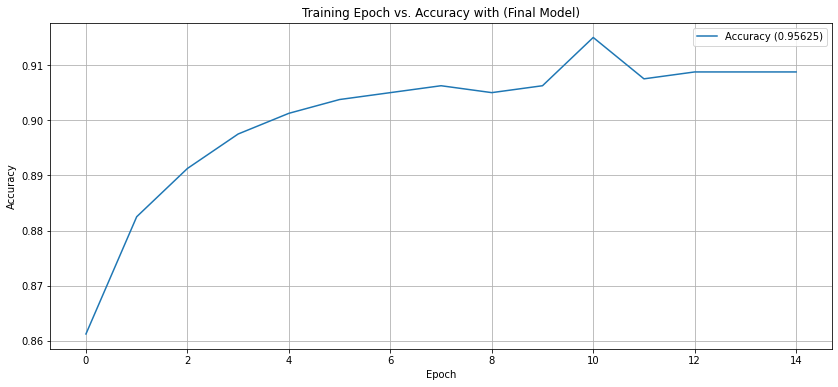

In [82]:

fig = plt.figure(figsize=(14, 6))

plt.title(f"Training Epoch vs. Accuracy with (Final Model)")
plt.xlabel("Epoch")
plt.ylabel('Accuracy')

plt.plot(eval_scores, label=f'Accuracy ({highest_score})')

plt.grid()
plt.legend()
plt.show()
fig.savefig(f'img/bpnn_best_model', dpi=100)

# Save Best Model & Predictions

In [81]:
import gzip
from evaluation import *
from model import Model


def evaluate(y, y_nn, name):
    acc_i, acc_overall = accuracy_score(y, y_nn)
    print(f'Overall {name} Accuracy: {acc_overall}')
    print(f'Class 0 {name} Accuracy: {acc_i[0]}')
    print(f'Class 1 {name} Accuracy: {acc_i[1]}')
    
def save_best_model(nn, data):
    # Save the best BPNN model to a pickle file
    print("# Saving model")
    
    y_test = []
    nn_y = []
    for x, y in data:
        decision = np.argmax(nn.feedforward(x))
        y_test.append(y.item())
        nn_y.append(decision.item())

    y_test = np.array(y_test)
    nn_y = np.array(nn_y)
    evaluate(y_test, nn_y, "Test")
    cm = get_confusion_matrix(y_test, nn_y, np.unique(y_test))
    Model(nn, nn_y, cm).save('bpnn.pkl')


training_data, validation_data, testing_data, ndimen = BPNN.get_data()
save_best_model(nn, testing_data)


# Saving model
Overall Test Accuracy: 0.9425403225806451
Class 0 Test Accuracy: 0.9410609037328095
Class 1 Test Accuracy: 0.9440993788819876


# Plot Bar Chart

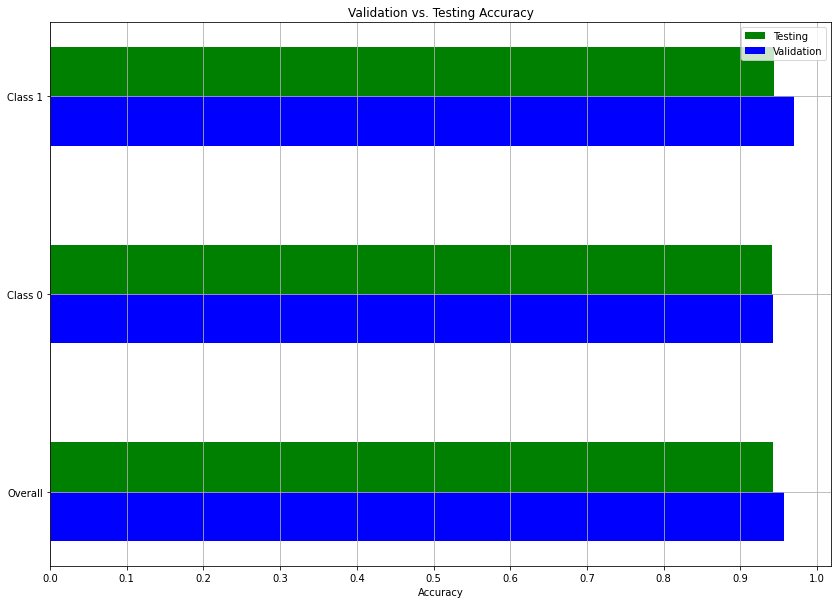

In [ ]:
from bpnn_cuda import *
from model import Model
import cupy as cp


def plot_vt_bar(tnn_acc, tnn_acc0, tnn_acc1, vnn_acc, vnn_acc0, vnn_acc1):
    # Plot a barchart comparing the validation vs testing accuracies overall, for class 0, and for class 1 side by side

    # set the y axis major ticks to .1 and minor ticks to .01
    major_ticks = np.arange(0, 1.1, 0.1)

    fig = plt.figure(figsize=(14, 10))

    plt.title(f"Validation vs. Testing Accuracy")
    plt.xlabel("Accuracy")

    width = 0.25
    plt.barh(0 + width/2, tnn_acc, width, label='Testing', color='green')
    plt.barh(0 - width/2, vnn_acc, width, label='Validation', color='blue')

    plt.barh(1 + width/2, tnn_acc0, width, color='green')
    plt.barh(1 - width/2, vnn_acc0, width, color='blue')

    plt.barh(2 + width/2, tnn_acc1, width, color='green')
    plt.barh(2 - width/2, vnn_acc1, width, color='blue')

    plt.yticks(np.arange(0, 3, 1), ['Overall', 'Class 0', 'Class 1'])
    plt.xticks(major_ticks)
    plt.grid()
    plt.legend()
    plt.show()
    fig.savefig(f'img/bpnn_validation_vs_testing', dpi=100)


def evaluate(data, name):

   # Load the best model from file
    best_model = Model.load('bpnn.pkl')

    y_test = []
    nn_y = []
    for x, y in data:
        decision = np.argmax(best_model.model.feedforward(x))
        y_test.append(y.item())
        nn_y.append(decision.item())

    y_test = np.array(y_test)
    nn_y = np.array(nn_y)

    acc_i, acc_overall = accuracy_score(y_test, nn_y)
    print(f'Overall {name} Accuracy: {acc_overall}')
    print(f'Class 0 {name} Accuracy: {acc_i[0]}')
    print(f'Class 1 {name} Accuracy: {acc_i[1]}')

    cm = get_confusion_matrix(y_test, nn_y, np.unique(y_test))

    plot_confusion_matrix(cm, np.unique(
        y_test), f'BPNN {name} Matrix')

    return acc_overall, acc_i[0], acc_i[1]


training_data, validation_data, testing_data, ndimen = BPNN.get_data()

vnn_acc, vnn_acc0, vnn_acc1 = evaluate(validation_data, "Validation")
tnn_acc, tnn_acc0, tnn_acc1 = evaluate(testing_data, "Testing")

plot_vt_bar(tnn_acc, tnn_acc0, tnn_acc1, vnn_acc, vnn_acc0, vnn_acc1)
